# Package

In [1]:
pip install spacy-stanza


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.2/881.2 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 30.8 MB/s eta 0:00:00


In [2]:
pip install stanza


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import random

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from nltk.tokenize import word_tokenize
from collections import Counter

# Data Preparation

In [4]:
data2 = pd.read_csv("df22.csv", delimiter=',')
df2 = pd.DataFrame(data2)

df2.head()

,Bahasa,Penilaian,Saran,Kategori,Tahun
0,id,4.0,Super good,General Affair,2022
1,id,NaN,Tidak ada,General Affair,2022
2,id,NaN,ok,General Affair,2022
3,id,NaN,baik,General Affair,2022
4,id,3.0,kampus sangat bersih dan tertata dengan rapih,General Affair,2022


In [5]:
df2.loc[0, 'Bahasa'] = 'en'

In [6]:
len(df2)

9922

In [7]:
data3 = pd.read_csv("df23.csv", delimiter=',')
df3 = pd.DataFrame(data3)

df3.head()

,Bahasa,Penilaian,Saran,Kategori,Tahun
0,id,3.0,-,Registrar Office,2023
1,id,4.0,Sudah baik,Registrar Office,2023
2,id,3.0,-,Registrar Office,2023
3,id,4.0,Layanannya sangat baik,Registrar Office,2023
4,id,4.0,Sudah baik lanjutkan,Registrar Office,2023


In [8]:
len(df3)

10938

In [9]:
data4 = pd.read_csv("df24.csv", delimiter=',')
df4 = pd.DataFrame(data4)

df4.head()

,Bahasa,Penilaian,Saran,Kategori,Tahun
0,id,4.0,"tidak saran dari saya, semua sudah cukup baik",Registrar Office,2024
1,id,3.0,Lebih fast respon di jam kerja.,Registrar Office,2024
2,id,4.0,Semuanya lebih baik digabungkan menjadi satu u...,Registrar Office,2024
3,id,4.0,Menurut saya layanan nya sudah baik,Registrar Office,2024
4,id,3.0,tidak ada,Registrar Office,2024


In [10]:
len(df4)

10382

In [11]:
df = pd.concat([df2, df3, df4])
df.head()

,Bahasa,Penilaian,Saran,Kategori,Tahun
0,en,4.0,Super good,General Affair,2022
1,id,NaN,Tidak ada,General Affair,2022
2,id,NaN,ok,General Affair,2022
3,id,NaN,baik,General Affair,2022
4,id,3.0,kampus sangat bersih dan tertata dengan rapih,General Affair,2022


In [12]:
df['Penilaian'] = pd.to_numeric(df['Penilaian'], errors='coerce').round(0).astype('Int64')

In [13]:
df = df.dropna(subset=['Penilaian'])

In [14]:
df.replace(2, 0, inplace=True)
df.replace(1, 0, inplace=True)
df.replace(3, 1, inplace=True)
df.replace(4, 1, inplace=True)


In [15]:
df = df[df['Penilaian'] != 702]

In [16]:
df['Kategori'] = df['Kategori'].replace('Fasilitas Difabel', 'General Affair')
df['Kategori'] = df['Kategori'].replace('Konseling HOPE', 'Student Life')
df = df[df['Kategori'] != 'GPIO']

#df['Kategori'] = df['Kategori'].replace('GPIO', 'General Affair')

<ipython-input-16-4484954b25c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Kategori'] = df['Kategori'].replace('Fasilitas Difabel', 'General Affair')
<ipython-input-16-4484954b25c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Kategori'] = df['Kategori'].replace('Konseling HOPE', 'Student Life')


In [17]:
nan_count = df['Penilaian'].isna().sum()
print(nan_count)


0


In [18]:
unique_count = df['Penilaian'].nunique()
print("Number of unique numbers in 'Penilaian':", unique_count)


Number of unique numbers in 'Penilaian': 2


In [19]:
unique_values = df['Penilaian'].unique()
print("Unique values in 'Penilaian':", unique_values)

Unique values in 'Penilaian': <IntegerArray>
[1, 0]
Length: 2, dtype: Int64


In [20]:
penilaian_counts = df['Penilaian'].value_counts()
print("Count of 1 in 'Penilaian':", penilaian_counts.get(1, 0))
print("Count of 0 in 'Penilaian':", penilaian_counts.get(0, 0))


Count of 1 in 'Penilaian': 22475
Count of 0 in 'Penilaian': 5184


In [21]:
penilaian_counts = df['Bahasa'].value_counts()

In [22]:
penilaian_counts

,count
Bahasa,
id,27406
en,253


# Data Preprocess

In [23]:
df_en = df[df['Bahasa'] == 'en']
df_id = df[df['Bahasa'] == 'id']

In [24]:
# Indonesian Pre-processing
import re

# Indonesian stop words
indonesian_stopwords = set([
    'yang', 'di', 'dan', 'dari', 'ke', 'itu', 'adalah', 'ini', 'pada',
    'dalam', 'untuk', 'sebagai', 'saya', 'anda', 'kami', 'mereka',
    'jika', 'apakah', 'tidak', 'ada', 'selain', 'dapat', 'merupakan',
    'seperti', 'juga', 'ini', 'itu', 'dan', 'atau', 'dengan',
    'terhadap', 'setiap', 'karena', 'sehingga', 'sampai', 'mungkin',
    'tentang', 'apa', 'tidak', 'lebih', 'paling', 'berbagai',
    'satu', 'dua', 'tiga', 'empat', 'lima', 'enam', 'tujuh', 'delapan',
    'sembilan', 'sepuluh', 'itu', 'jika', 'kita', 'tetapi',
    'namun', 'serta', 'dan', 'melalui', 'kecuali', 'semua',
    'saya', 'anda', 'mereka', 'kamu', 'bagaimana', 'dimana',
    'mengapa', 'apa', 'yang', 'itu', 'itu', 'sudah', 'akan',
    'dari', 'ke', 'tapi', 'walau', 'sedangkan', 'sebab',
    'diantara', 'melainkan', 'walaupun', 'begitu', 'kembali',
    'apabila', 'jika', 'seperti', 'sama', 'saja', 'atau',
    'sementara', 'hingga', 'sesudah', 'selama', 'sampai',
    'berdasarkan', 'menggunakan', 'mengenai', 'berasal',
    'mendapatkan', 'memberikan', 'membutuhkan', 'dijadikan',
    'dilakukan', 'memiliki', 'merasa', 'mengetahui', 'memperoleh',
    'akan', 'seperti', 'ada', 'melakukan', 'menyebabkan', 'berlaku'
])

# Function for Indonesian text preprocessing without stemming
def preprocess_indonesian_text(text):
    # Remove punctuation
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)  # Remove punctuation
    # Convert to lowercase
    text = text.lower()
    # Tokenization
    tokens = text.split()
    # Remove stop words
    tokens = [word for word in tokens if word not in indonesian_stopwords]
    return ' '.join(tokens)


In [25]:
import re
import nltk
from nltk.corpus import stopwords

# Ensure that the required NLTK data is downloaded
nltk.download('stopwords')

# Get the list of English stopwords from nltk
english_stopwords = set(stopwords.words('english'))

# Function for English text preprocessing without stemming
def preprocess_english_text(text):
    # Remove punctuation using regex
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)  # Removes punctuation, keeps letters and digits
    # Convert to lowercase
    text = text.lower()
    # Tokenization (split text into words)
    tokens = text.split()
    # Remove stop words
    tokens = [word for word in tokens if word not in english_stopwords]
    return ' '.join(tokens)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [26]:
# Apply preprocessing to the text column
df_id['Saran'] = df_id['Saran'].apply(preprocess_indonesian_text)

<ipython-input-26-9259be12a518>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_id['Saran'] = df_id['Saran'].apply(preprocess_indonesian_text)


In [27]:
df_en['Saran'].iloc[41:50]

,Saran
6704,"There isn't any suggestion for online study, I..."
6736,Comments: I really enjoy the learning experien...
6747,Tidak efektif dan tidak yang diharapkan
6748,Online learning is indeed hard in itself.
6823,"The lack of commute is very convenient, especi..."
6865,Forums and essays can only do so much. Achievi...
6867,It's difficult to build relationship with frie...
6870,the connection sometimes is bad.
6873,I feel like I could've studied better on-site ...


In [28]:
# Apply preprocessing to the text column
df_en['Saran'] = df_en['Saran'].apply(preprocess_english_text)

<ipython-input-28-9e593c3dfd8a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_en['Saran'] = df_en['Saran'].apply(preprocess_english_text)


In [29]:
df_en['Saran'].iloc[41:50]

,Saran
6704,isnt suggestion online study hope day study cl...
6736,comments really enjoy learning experience lear...
6747,tidak efektif dan tidak yang diharapkan
6748,online learning indeed hard
6823,lack commute convenient especially class ends ...
6865,forums essays much achieving higher order thin...
6867,difficult build relationship friends teachers ...
6870,connection sometimes bad
6873,feel like couldve studied better onsite withou...


In [30]:
nan_count = df_en['Saran'].isna().sum()
print(nan_count)


0


In [31]:
df = pd.concat([df_en, df_id])
df.head()

,Bahasa,Penilaian,Saran,Kategori,Tahun
0,en,1,super good,General Affair,2022
193,en,1,good,General Affair,2022
286,en,0,b building dirty,General Affair,2022
1007,en,0,clean trash,General Affair,2022
1352,en,0,rule asking wear mask gym exercising harmful h...,Olahraga,2022


In [32]:
len(df_id)

27406

In [33]:
# Function to check for punctuation
def has_punctuation(text):
    return bool(re.search(r'[^\w\s]', text))  # Search for any character that is not a word character or whitespace

# Apply the function to the column and create a new column 'has_punctuation'
df['has_punctuation'] = df['Saran'].apply(has_punctuation)

# Count the number of True values
punctuation_count = df['has_punctuation'].sum()

# Display the count
print("Number of entries with punctuation:", punctuation_count)

Number of entries with punctuation: 0


In [34]:
df = df.drop(columns=['has_punctuation'])

In [35]:
nan_count = df['Saran'].isna().sum()
print(nan_count)

0


In [36]:
df.loc[df['Saran'] == '', 'Saran'] = None
df.isna().sum()


,0
Bahasa,0
Penilaian,0
Saran,7648
Kategori,0
Tahun,0


In [37]:
df = df.dropna()
df.isna().sum()

,0
Bahasa,0
Penilaian,0
Saran,0
Kategori,0
Tahun,0


In [38]:
penilaian_counts = df['Penilaian'].value_counts()
print("Count of 1 in 'Penilaian':", penilaian_counts.get(1, 0))
print("Count of 0 in 'Penilaian':", penilaian_counts.get(0, 0))


Count of 1 in 'Penilaian': 15706
Count of 0 in 'Penilaian': 4305


In [39]:
df_en = df[df['Bahasa'] == 'en']
df_id = df[df['Bahasa'] == 'id']

In [40]:
penilaian_counts = df_id['Penilaian'].value_counts()
print("Count of 1 in 'Penilaian':", penilaian_counts.get(1, 0))
print("Count of 0 in 'Penilaian':", penilaian_counts.get(0, 0))


Count of 1 in 'Penilaian': 15559
Count of 0 in 'Penilaian': 4215


In [41]:
penilaian_counts = df_en['Penilaian'].value_counts()
print("Count of 1 in 'Penilaian':", penilaian_counts.get(1, 0))
print("Count of 0 in 'Penilaian':", penilaian_counts.get(0, 0))


Count of 1 in 'Penilaian': 147
Count of 0 in 'Penilaian': 90


In [42]:
df_id

,Bahasa,Penilaian,Saran,Kategori,Tahun
4,id,1,kampus sangat bersih tertata rapih,General Affair,2022
5,id,1,sangat baik hanya diperhatikan kebersihan lant...,General Affair,2022
6,id,1,kebersihan tempat sampah menambahkan tempat sa...,General Affair,2022
7,id,1,ad,General Affair,2022
8,id,1,bagus,General Affair,2022
...,...,...,...,...,...
10372,id,1,sangat puas dgn layanan perpustakaan uph terut...,Perpustakaan,2024
10375,id,1,saran tolong pengecekan kelistrikan pernah beb...,Perpustakaan,2024
10376,id,1,baik,Perpustakaan,2024
10380,id,0,banyak baca referensi libraryuphedu websitenya...,Perpustakaan,2024


In [43]:
balanced_df = pd.DataFrame()

# Loop through each Kategori in the dataset
for Kategori in df_id['Kategori'].unique():
    # Filter the data by Kategori
    Kategori_data = df_id[df_id['Kategori'] == Kategori]

    # Separate the data by class
    class_0 = Kategori_data[Kategori_data['Penilaian'] == 0]
    class_1 = Kategori_data[Kategori_data['Penilaian'] == 1]

    # Sample 170 instances from each class if possible
    class_0_sample = class_0.sample(n=min(170, len(class_0)), random_state=1)
    class_1_sample = class_1.sample(n=min(170, len(class_1)), random_state=1)

    # Calculate how many more samples are needed to reach 350
    total_samples = len(class_0_sample) + len(class_1_sample)
    remaining_needed = 340 - total_samples

    # Fill up with additional samples from the other class
    if remaining_needed > 0:
        if len(class_0_sample) < 170:
            additional_samples = class_1.sample(n=min(remaining_needed, len(class_1)), random_state=1)
            class_1_sample = pd.concat([class_1_sample, additional_samples])
        elif len(class_1_sample) < 170:
            additional_samples = class_0.sample(n=min(remaining_needed, len(class_0)), random_state=1)
            class_0_sample = pd.concat([class_0_sample, additional_samples])

    # Combine the sampled data
    Kategori_sample = pd.concat([class_0_sample, class_1_sample], axis=0)

    # Add the sampled data to the final dataset
    balanced_df = pd.concat([balanced_df, Kategori_sample], axis=0)

# Shuffle the dataset and reset the index
balanced_df = balanced_df.sample(frac=1, random_state=1).reset_index(drop=True)

# Check the result
print(f"Total rows in balanced_df: {len(balanced_df)}")
print(balanced_df.head())


Total rows in balanced_df: 3740
  Bahasa  Penilaian                                              Saran  \
0     id          1  baik sejauh bisa diperbaikin contohnya melihat...   
1     id          0  kegiatan mentoring sebaiknya dipilih mentor in...   
2     id          0  mohon diperbanyak bukubuku terbaru memudahkan ...   
3     id          1                                               puas   
4     id          0                                   bagus layanan ro   

           Kategori  Tahun  
0      Perpustakaan   2024  
1      Student Life   2022  
2      Perpustakaan   2024  
3     Career Center   2023  
4  Registrar Office   2024  


In [44]:
len(balanced_df)

3740

In [45]:
balanced_df

,Bahasa,Penilaian,Saran,Kategori,Tahun
0,id,1,baik sejauh bisa diperbaikin contohnya melihat...,Perpustakaan,2024
1,id,0,kegiatan mentoring sebaiknya dipilih mentor in...,Student Life,2022
2,id,0,mohon diperbanyak bukubuku terbaru memudahkan ...,Perpustakaan,2024
3,id,1,puas,Career Center,2023
4,id,0,bagus layanan ro,Registrar Office,2024
...,...,...,...,...,...
3735,id,0,terbatas devicesnya,UPH Wifi,2023
3736,id,1,waktu nya bisa dipercepat proses data,Registrar Office,2024
3737,id,0,wifinya kencengin soalnya gapernah bisa pake w...,Perpustakaan,2023
3738,id,1,toilet dekat fj diperbagus supaya enak dilihat,General Affair,2022


In [46]:
penilaian_counts = balanced_df['Penilaian'].value_counts()
print("Count of 1 in 'Penilaian':", penilaian_counts.get(1, 0))
print("Count of 0 in 'Penilaian':", penilaian_counts.get(0, 0))


Count of 1 in 'Penilaian': 2001
Count of 0 in 'Penilaian': 1739


In [47]:
random_seed = 1

# Shuffle and split the positive and negative data
positive_df = balanced_df[balanced_df['Penilaian'] == 1].sample(frac=1, random_state=random_seed).reset_index(drop=True)
negative_df = balanced_df[balanced_df['Penilaian'] == 0].sample(frac=1, random_state=random_seed).reset_index(drop=True)

# Create the first 7 datasets with 233 samples each for class 0 and class 1
for i in range(7):
    pos_split = positive_df.iloc[i * 233:(i + 1) * 233]
    neg_split = negative_df.iloc[i * 233:(i + 1) * 233]

    # Concatenate and shuffle the split
    split_df = pd.concat([pos_split, neg_split]).sample(frac=1, random_state=42).reset_index(drop=True)

    # Create a separate variable for each dataset
    exec(f"df_id_{i+1} = split_df")

# For the 8th dataset, take the remaining samples
pos_split = positive_df.iloc[7 * 233:]
neg_split = negative_df.iloc[7 * 233:]

# Concatenate and shuffle the last split
split_df = pd.concat([pos_split, neg_split]).sample(frac=1, random_state=42).reset_index(drop=True)

# Create the last variable
exec("df_id_8 = split_df")

# Check the results
for i in range(1, 9):
    exec(f"print(f'df_id_{i}:', eval('df_id_' + str(i)).shape)")


df_id_1: (466, 5)
df_id_2: (466, 5)
df_id_3: (466, 5)
df_id_4: (466, 5)
df_id_5: (466, 5)
df_id_6: (466, 5)
df_id_7: (466, 5)
df_id_8: (478, 5)


In [48]:
df_cv_id = pd.concat([df_id_1, df_id_2, df_id_3, df_id_4, df_id_5, df_id_6, df_id_7])
df_test_id = pd.concat([df_id_8])

# TF-IDF Calculations

In [ ]:
df_id['Saran'].iloc[1]

'sangat baik hanya diperhatikan kebersihan lantainya'

In [ ]:
# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(3, 3))

# Fit the model and transform the documents into TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(df_id['Saran'])

# Get the words (features) corresponding to the TF-IDF values
words = vectorizer.get_feature_names_out()

# Convert the TF-IDF matrix to an array to view the values
tfidf_array = tfidf_matrix.toarray()

# Print the TF-IDF values for each word in the first 3 and the last 2 documents
num_documents = len(df_id['Saran'])

for i in range(num_documents):
    # Print only the first 3 and the last 2 documents
    if i < 3 or i >= num_documents - 2:
        print(f"Document {i+1}:")

        # Create a list of (word, tfidf_value) for non-zero tfidf values
        non_zero_words = [(words[j], tfidf_array[i][j]) for j in range(len(words)) if tfidf_array[i][j] > 0]

        # Sort the non-zero words by the TF-IDF value (optional, can also just use the order of appearance)
        non_zero_words.sort(key=lambda x: x[1], reverse=True)  # Sort by TF-IDF value descending

        # Print the first 5 words (with the highest TF-IDF values)
        print("First 5 words with non-zero values:")
        for word, tfidf_value in non_zero_words[:5]:
            print(f"{word}: {tfidf_value:.4f}")

        # Print the last 3 words (with the lowest TF-IDF values but still non-zero)
        print("Last 3 words with non-zero values:")
        for word, tfidf_value in non_zero_words[-3:]:
            print(f"{word}: {tfidf_value:.4f}")

        print()


Document 1:
First 5 words with non-zero values:
bersih tertata rapih: 0.5946
sangat bersih tertata: 0.5946
kampus sangat bersih: 0.5412
Last 3 words with non-zero values:
bersih tertata rapih: 0.5946
sangat bersih tertata: 0.5946
kampus sangat bersih: 0.5412

Document 2:
First 5 words with non-zero values:
baik hanya diperhatikan: 0.5192
diperhatikan kebersihan lantainya: 0.5192
hanya diperhatikan kebersihan: 0.5192
sangat baik hanya: 0.4373
Last 3 words with non-zero values:
diperhatikan kebersihan lantainya: 0.5192
hanya diperhatikan kebersihan: 0.5192
sangat baik hanya: 0.4373

Document 3:
First 5 words with non-zero values:
menambahkan tempat sampah: 0.5049
sampah menambahkan tempat: 0.5049
tempat sampah menambahkan: 0.5049
kebersihan tempat sampah: 0.4849
Last 3 words with non-zero values:
sampah menambahkan tempat: 0.5049
tempat sampah menambahkan: 0.5049
kebersihan tempat sampah: 0.4849

Document 19773:
First 5 words with non-zero values:
baca referensi libraryuphedu: 0.3553
ban

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer (BoW)
vectorizer = CountVectorizer()

# Fit the model and transform the documents into a Bag of Words matrix
bow_matrix = vectorizer.fit_transform(df_id['Saran'])

# Get the words (features) corresponding to the BoW values
words = vectorizer.get_feature_names_out()

# Convert the BoW matrix to an array to view the values
bow_array = bow_matrix.toarray()

# Print the BoW values for each word in the first 3 and the last 2 documents
num_documents = len(df_id['Saran'])

for i in range(num_documents):
    # Print only the first 3 and the last 2 documents
    if i < 3 or i >= num_documents - 2:
        print(f"Document {i+1}:")

        # Create a list of (word, count) for non-zero BoW values
        non_zero_words = [(words[j], bow_array[i][j]) for j in range(len(words)) if bow_array[i][j] > 0]

        # Sort the non-zero words by the count value (optional, can also just use the order of appearance)
        non_zero_words.sort(key=lambda x: x[1], reverse=True)  # Sort by word frequency descending

        # Print the first 5 words (with the highest frequency)
        print("First 5 words with non-zero counts:")
        for word, count in non_zero_words[:5]:
            print(f"{word}: {count}")

        # Print the last 3 words (with the lowest frequency but still non-zero)
        print("Last 3 words with non-zero counts:")
        for word, count in non_zero_words[-3:]:
            print(f"{word}: {count}")

        print()


Document 1:
First 5 words with non-zero counts:
bersih: 1
kampus: 1
rapih: 1
sangat: 1
tertata: 1
Last 3 words with non-zero counts:
rapih: 1
sangat: 1
tertata: 1

Document 2:
First 5 words with non-zero counts:
baik: 1
diperhatikan: 1
hanya: 1
kebersihan: 1
lantainya: 1
Last 3 words with non-zero counts:
kebersihan: 1
lantainya: 1
sangat: 1

Document 3:
First 5 words with non-zero counts:
sampah: 2
tempat: 2
kebersihan: 1
menambahkan: 1
Last 3 words with non-zero counts:
tempat: 2
kebersihan: 1
menambahkan: 1

Document 19773:
First 5 words with non-zero counts:
baca: 1
banyak: 1
eror: 1
krusial: 1
libraryuphedu: 1
Last 3 words with non-zero counts:
sering: 1
waktuwaktu: 1
websitenya: 1

Document 19774:
First 5 words with non-zero counts:
pertahankan: 1
Last 3 words with non-zero counts:
pertahankan: 1



# Naive Bayes (TF-IDF 1-gram)

## Indonesia

In [71]:
X_train = df_cv_id['Saran']
y_train = df_cv_id['Penilaian']
X_test = df_test_id['Saran']
y_test = df_test_id['Penilaian']

In [72]:
len(df_test_id)

478

In [73]:
X_train, X_test, y_train, y_test = train_test_split(df_cv_id['Saran'], df_cv_id['Penilaian'], test_size=0.2, random_state=42)

In [74]:
vectorizer = TfidfVectorizer()
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('nb', BernoulliNB())
])

In [75]:
param_grid = {
    'nb__alpha': [1e-6, 1e-5, 1e-4, 0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0, 500.0, 1000.0]
}

In [76]:
# Assuming you've already defined your pipeline and param_grid
# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Best alpha value
print("Best alpha:", grid_search.best_params_['nb__alpha'])
best_model = grid_search.best_estimator_

# Get the results of the grid search
results = pd.DataFrame(grid_search.cv_results_)

# Sort results by 'mean_test_score' (F1-score) in descending order
top_5_results = results[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False).head(5)

# Display top 5 models based on F1-score
print("\nTop 5 models based on F1-score:")
print(top_5_results)


Best alpha: 5.0

Top 5 models based on F1-score:
                 params  mean_test_score
10   {'nb__alpha': 5.0}         0.692117
11  {'nb__alpha': 10.0}         0.690163
9    {'nb__alpha': 2.0}         0.689641
7    {'nb__alpha': 0.5}         0.688727
6    {'nb__alpha': 0.1}         0.687001


In [77]:
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

f1 = f1_score(y_test, y_pred, average='binary') # atau binary
print("F1-score:", f1)

Test accuracy: 0.5926493108728943
Confusion Matrix:
 [[ 91 246]
 [ 20 296]]
F1-score: 0.6899766899766899


In [78]:
pred = best_model.predict(df_test_id['Saran'])
df_test_id['tf-idf1'] = pred

In [57]:
seed_value = 1
np.random.seed(seed_value)
random.seed(seed_value)

# Access the vectorizer and Naive Bayes model from the pipeline
vectorizer = best_model.named_steps['vectorizer']
nb_model = best_model.named_steps['nb']

# Get feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Get the log probabilities for each class
log_probabilities = nb_model.feature_log_prob_

# Convert log probabilities to probabilities
probabilities = np.exp(log_probabilities)

# Create a DataFrame for easier analysis
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Negative Class': probabilities[0],  # Probabilities for class 0
    'Positive Class': probabilities[1]  # Probabilities for class 1
})

# Sort features by their contribution to the positive class
top_positive = feature_importance.sort_values(by='Positive Class', ascending=False).head(10)

# Sort features by their contribution to the negative class
top_negative = feature_importance.sort_values(by='Negative Class', ascending=False).head(10)

# Display top features for both classes
print("Top Features for Positive Class:")
print(top_positive)

print("\nTop Features for Negative Class:")
print(top_negative)


Top Features for Positive Class:
        Feature  Negative Class  Positive Class
246        baik        0.100460        0.308679
3120     sangat        0.072853        0.160755
238       bagus        0.032975        0.094340
665       cukup        0.053681        0.086792
2046  mahasiswa        0.105828        0.057358
1888       lagi        0.090491        0.056604
3817        uph        0.085123        0.051321
485        bisa        0.128834        0.049057
2969       puas        0.021472        0.042264
1935    layanan        0.031442        0.036226

Top Features for Negative Class:
        Feature  Negative Class  Positive Class
485        bisa        0.128834        0.049057
1874     kurang        0.114264        0.030189
2046  mahasiswa        0.105828        0.057358
246        baik        0.100460        0.308679
1888       lagi        0.090491        0.056604
3817        uph        0.085123        0.051321
272      banyak        0.078988        0.028679
3120     sangat      

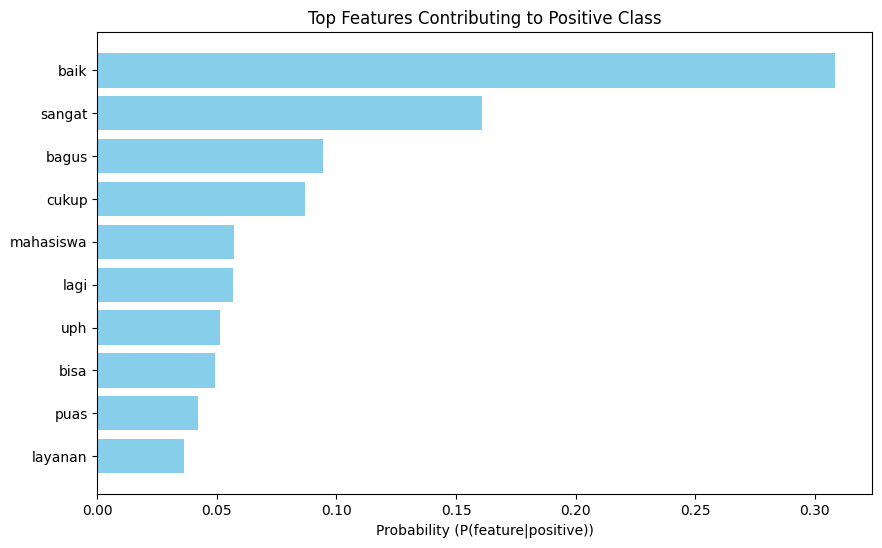

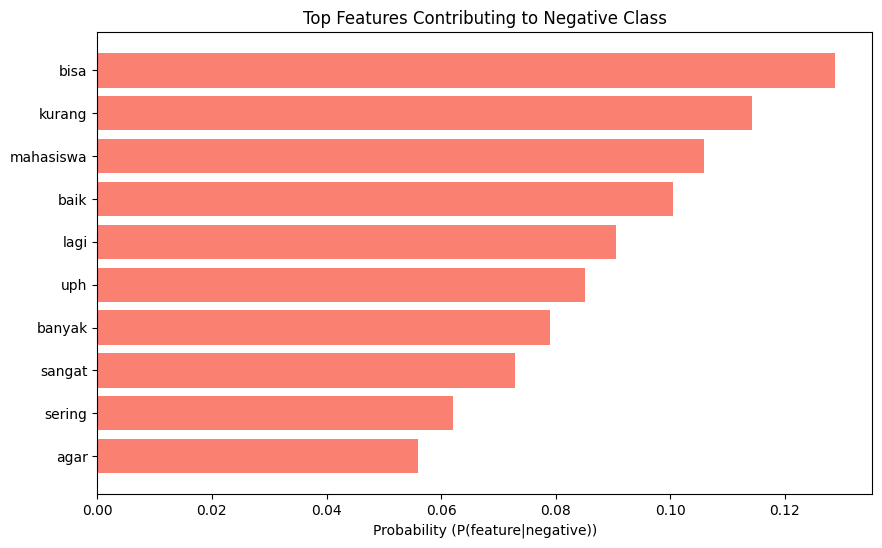

In [58]:
import matplotlib.pyplot as plt

# Plot top positive features
plt.figure(figsize=(10, 6))
plt.barh(top_positive['Feature'], top_positive['Positive Class'], color='skyblue')
plt.xlabel("Probability (P(feature|positive))")
plt.title("Top Features Contributing to Positive Class")
plt.gca().invert_yaxis()  # Reverse order for readability
plt.show()

# Plot top negative features
plt.figure(figsize=(10, 6))
plt.barh(top_negative['Feature'], top_negative['Negative Class'], color='salmon')
plt.xlabel("Probability (P(feature|negative))")
plt.title("Top Features Contributing to Negative Class")
plt.gca().invert_yaxis()
plt.show()


In [59]:
df_cv_id['Kategori'] = df_cv_id['Kategori'].replace({'UPH Mobile': 'Mobile App', 'UPH Wifi': 'Wifi',
                                         'IT Service Desk UPH': 'IT Service Desk'})


In [60]:
pip install stanza


In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spacy
import spacy_stanza

# Load the Indonesian language model
#spacy_stanza.download("id")  # Only needed once
nlp = spacy_stanza.load_pipeline("id")  # Replace "id" with "en" for English

exclude_words = {"wifi", "uph", "ro", "one", "olahraga", "library", "perpustakaan", "mobile", "aplikasi",
                 "app", "center", "career", "karir", "student", "life", "finance", "keuangan", "office",
                 "registrar", "it", "desk", "service", "good", "fast"}

def extract_aspects(text, exclude_words):
    """
    Extract nouns and proper nouns from the text using spaCy's POS tagging,
    and exclude specific words.
    """
    doc = nlp(text)
    aspect_terms = [token.text for token in doc if token.pos_ in {"NOUN", "PROPN"} and token.text.lower() not in exclude_words]
    return " ".join(aspect_terms)

# Access the vectorizer and Naive Bayes model from the pipeline
vectorizer = best_model.named_steps['vectorizer']
nb_model = best_model.named_steps['nb']

# Preprocess the `Saran` column in your dataset to extract aspect terms
df_cv_id['Aspects'] = df_cv_id['Saran'].apply(lambda x: extract_aspects(x, exclude_words))

# Get the categories in the "Kategori" column
kategori_values = df_cv_id['Kategori'].unique()

# Initialize a dictionary to store the top features for each kategori
top_features_by_kategori = {}

# Loop over each category (1 through 11)
for kategori in kategori_values:
    # Filter the dataset for the current category
    kategori_data = df_cv_id[df_cv_id['Kategori'] == kategori]

    # Get the features and labels for this subset of the data
    X_kategori = vectorizer.fit_transform(kategori_data['Aspects'])  # Use the extracted aspects
    y_kategori = kategori_data['Penilaian']  # Replace with your target/label column

    # Fit the Naive Bayes model for this subset of the data
    nb_model_kategori = nb_model.fit(X_kategori, y_kategori)

    # Get feature names and log probabilities
    feature_names = vectorizer.get_feature_names_out()
    log_probabilities = nb_model_kategori.feature_log_prob_
    probabilities = np.exp(log_probabilities)

    # Create a DataFrame to hold the feature importances
    feature_importance_kategori = pd.DataFrame({
        'Feature': feature_names
    })

    # Add probabilities for each class
    for i, class_name in enumerate(nb_model_kategori.classes_):
        feature_importance_kategori[class_name] = probabilities[i]

    # Sort the features by their contribution to each class (class 0 and class 1)
    top_features_kategori = {}
    for class_name in nb_model_kategori.classes_:
        top_features_kategori[class_name] = feature_importance_kategori.sort_values(by=class_name, ascending=False).head(10)

    # Store the top features for this category
    top_features_by_kategori[kategori] = top_features_kategori

    # Display top features for class 0 and class 1 in this category
    print(f"\nTop Features for Category {kategori} - Class 0:")
    print(top_features_kategori[0])

    print(f"\nTop Features for Category {kategori} - Class 1:")
    print(top_features_kategori[1])

    # Plot for class 0
    plt.figure(figsize=(10, 6))
    bars0 = plt.bar(top_features_kategori[0]['Feature'], top_features_kategori[0][0], color='salmon')
    plt.ylabel("Probability", fontsize=16)
    plt.title(f"Top Features for Category {kategori} - Class 0", fontsize=16)
    plt.xticks(rotation=45, fontsize=16)
    plt.yticks(fontsize=16)

    # Add numbers inside the bars for class 0
    for bar in bars0:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05 * bar.get_height(),
                 f'{bar.get_height():.2f}', ha='center', va='top', fontsize=14, color='black')

    plt.tight_layout()
    plt.show()

    # Plot for class 1
    plt.figure(figsize=(10, 6))
    bars1 = plt.bar(top_features_kategori[1]['Feature'], top_features_kategori[1][1], color='skyblue')
    plt.ylabel("Probability", fontsize=16)
    plt.title(f"Top Features for Category {kategori} - Class 1", fontsize=16)
    plt.xticks(rotation=45, fontsize=16)
    plt.yticks(fontsize=16)

    # Add numbers inside the bars for class 1
    for bar in bars1:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05 * bar.get_height(),
                 f'{bar.get_height():.2f}', ha='center', va='top', fontsize=14, color='black')

    plt.tight_layout()
    plt.show()


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: id (Indonesian):
| Processor    | Package      |
-------------------------------
| tokenize     | gsd          |
| mwt          | gsd          |
| pos          | gsd_charlm   |
| lemma        | gsd_nocharlm |
| constituency | icon_charlm  |
| depparse     | gsd_charlm   |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
/usr/local/lib/python3.10/dist-packages/stanza/models/tokenization/trainer.py:82: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be al

KeyboardInterrupt: 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Undesired tokens
undesired_tokens = {"[SEP]", "[CLS]", "[PAD]", "baik", "cukup", "the", "##bahan", "belum", "##p", "sangat", "##cs", "##pon", "##rod", "##ak",
                    "##V", "##v", "##ace", "indo", "ms", "ad", "bisa", "##cs", "0", "belum", "mantap", "puas", "ok", "##nya", "lagi", "kadang",
                    "lbh", "dor", "ya", "my", "lagi", "tak", "##full", "career", "banyak", "adanya", "sesuai", "read", "finance", "keuangan",
                    "tif", "##aga", "bg", "bagus", "##idah", "dll", "op", "semoga", "##g", "sendiri", "##ilang", "beberapa", "nya", "##ya",
                    "##baik", "sdh", "##n", "ns", "2", "semakin", "good", "gak", "selebihnya", "##s", "menurut", "##ful", "##if", "##time",
                    "every", "##a", "dan", "##k", "##lain", "bis", "meng", "hal", "##an", "##ed", "us", "ai", "##al", "##ssion", "##pro",
                    "##fe", "un", "##x", "##line", "really", "would", "##d", "##abe", "ta", "always", "found", "##date", "##to", "up",
                    "use", "well", "##les", "could", "done", "##h", "me", "day", "often", "tend", "might", "need", "deep", "##ece", "##ih",
                    "se", "lai", "maybe", "##fle", "[SEP]", "[CLS]", "[PAD]", "baik", "cukup", "the", "##bahan", "belum", "##p", "sangat", "##cs", "##pon", "##rod", "##ak",
                    "##V", "##v", "##ace", "indo", "ms", "ad", "bisa", "##cs", "0", "belum" ,"mantap", "puas", "ok", "##nya", "lagi", "kadang",
                    "lbh", "dor", "ya", "my", "lagi", "tak", "##full", "career", "banyak", "adanya", "sesuai", "read", "finance", "keuangan",
                    "tif", "##aga", "bg", "bagus", "##idah", "dll", "op", "semoga", "##g", "sendiri", "##ilang", "beberapa", "nya", "##ya",
                    "##baik", "sdh", "##n", "ns", "2", "semakin", "good", "gak", "selebihnya", "##s", "menurut", "##ful", "##if", "##iak", "##le",
                    "##din", "##sin", "##onfirmasi", "b", "##ublish", "##integr", "na", "it", "all", "yes", "##h", "oke", "##osialisasikan", "##kan", "g",
                    "##eg","##sion", "##in", "##ic", "##t", "ga", "1", "24", "r", "##look", "##ev", "##us", "##jr","##il", "kan", "##ian", "##bai",
                    "##kan", "##ki", "##les", "##d", "##abe", "ta", "##an", "##taka", "me", "##ed", "##a", "##k","##an" "##lain", "##mp", "##er", "di",
                    "un", "ai","##lain", "##ece", "##ih", "se", "##time", "##pus", "uph", "mobile", "center", "mahasiswa", "perpustakaan", "wifi", "kurang"}

# Access the vectorizer and Naive Bayes model from the pipeline
vectorizer = best_model.named_steps['vectorizer']
nb_model = best_model.named_steps['nb']

# Get feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Remove undesired tokens from feature names
filtered_feature_names = [feature for feature in feature_names if feature not in undesired_tokens]

# Get the log probabilities for each class
log_probabilities = nb_model.feature_log_prob_

# Convert log probabilities to probabilities
probabilities = np.exp(log_probabilities)

# Get the categories in the "Kategori" column (assuming you have this in your data)
kategori_values = df_cv_id['Kategori'].unique()  # Assuming 'df_cv_id' is your DataFrame

# Initialize a dictionary to store the top features for each kategori
top_features_by_kategori = {}

# Loop over each category (1 through 11)
for kategori in kategori_values:
    # Filter the dataset for the current category
    kategori_data = df_cv_id[df_cv_id['Kategori'] == kategori]

    # Get the features and labels for this subset of the data
    X_kategori = vectorizer.transform(kategori_data['Saran'])  # Replace 'Saran' with your actual text column
    y_kategori = kategori_data['Penilaian']  # Replace 'Penilaian' with your target/label column

    # Fit the Naive Bayes model for this subset of the data
    nb_model_kategori = nb_model.fit(X_kategori, y_kategori)

    # Create a DataFrame to hold the feature importances for the current category
    feature_importance_kategori = pd.DataFrame({
        'Feature': filtered_feature_names
    })

    # Add the probabilities for each class to the DataFrame for this category
    for i, class_name in enumerate(nb_model_kategori.classes_):
        # Only select features that are still in the filtered list (matching the filtered_feature_names)
        feature_importance_kategori[class_name] = np.exp(nb_model_kategori.feature_log_prob_[i])[[
            feature_names.tolist().index(f) for f in filtered_feature_names
        ]]

    # Sort the features by their contribution to each class (class 0 and class 1)
    top_features_kategori = {}
    for class_name in nb_model_kategori.classes_:
        top_features_kategori[class_name] = feature_importance_kategori.sort_values(by=class_name, ascending=False).head(10)

    # Store the top features for this category
    top_features_by_kategori[kategori] = top_features_kategori

    # Display top features for class 0 and class 1 in this category
    print(f"\nTop Features for Category {kategori} - Class 0:")
    print(top_features_kategori[0])

    print(f"\nTop Features for Category {kategori} - Class 1:")
    print(top_features_kategori[1])

    # Plot for class 0
    plt.figure(figsize=(10, 6))  # Create a new figure for class 0
    bars0 = plt.bar(top_features_kategori[0]['Feature'], top_features_kategori[0][0], color='salmon')
    plt.ylabel("Probability", fontsize=16)
    plt.title(f"Top Features for Category {kategori} - Class 0", fontsize=16)
    plt.xticks(rotation=45, fontsize=16)
    plt.yticks(fontsize=16)

    # Add numbers inside the bars for class 0
    for bar in bars0:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05 * bar.get_height(),
                f'{bar.get_height():.2f}', ha='center', va='top', fontsize=14, color='black')


    plt.tight_layout()
    plt.show()

    # Plot for class 1
    plt.figure(figsize=(10, 6))  # Create a new figure for class 1
    bars1 = plt.bar(top_features_kategori[1]['Feature'], top_features_kategori[1][1], color='skyblue')
    plt.ylabel("Probability", fontsize=16)
    plt.title(f"Top Features for Category {kategori} - Class 1", fontsize=16)
    plt.xticks(rotation=45, fontsize=16)
    plt.yticks(fontsize=16)

    # Add numbers inside the bars for class 1
    for bar in bars1:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05 * bar.get_height(),
                f'{bar.get_height():.2f}', ha='center', va='top', fontsize=14, color='black')

    plt.tight_layout()
    plt.show()




## English

In [62]:
random_seed = 1
df_cv_en, df_test_en = train_test_split(df_en, test_size=0.125, random_state=random_seed)

In [63]:
len(df_test_en)

30

In [64]:
df_test_en

,Bahasa,Penilaian,Saran,Kategori,Tahun
4899,en,1,good,General Affair,2024
5955,en,0,meh,UPH Wifi,2023
653,en,1,suggestions comments,Registrar Office,2023
1209,en,0,add uptodate equipments,Olahraga,2023
6788,en,0,found language barriers improved english,IT Service Desk UPH,2024
1352,en,0,rule asking wear mask gym exercising harmful h...,Olahraga,2022
1193,en,0,quality table tennis equipments deteriorating ...,Olahraga,2023
4730,en,1,mentors ta always availabe,Student Life,2022
5702,en,0,need improve connection,UPH Wifi,2023
7441,en,1,mflex good smart approach terms offline online...,Pengalaman Belajar,2024


In [65]:
X_train, X_test, y_train, y_test = train_test_split(df_cv_en['Saran'], df_cv_en['Penilaian'], test_size=0.2, random_state=random_seed)

In [66]:
vectorizer = TfidfVectorizer()
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('nb', BernoulliNB())
])

In [67]:
param_grid = {
    'nb__alpha': [1e-6, 1e-5, 1e-4, 0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0, 500.0, 1000.0]
}

In [68]:
# Assuming you've already defined your pipeline and param_grid
# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Best alpha value
print("Best alpha:", grid_search.best_params_['nb__alpha'])
best_model = grid_search.best_estimator_

# Get the results of the grid search
results = pd.DataFrame(grid_search.cv_results_)

# Sort results by 'mean_test_score' (F1-score) in descending order
top_5_results = results[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False).head(10)

# Display top 5 models based on F1-score
print("\nTop 5 models based on F1-score:")
print(top_5_results)


Best alpha: 2.0

Top 5 models based on F1-score:
                   params  mean_test_score
9      {'nb__alpha': 2.0}         0.763941
10     {'nb__alpha': 5.0}         0.763941
16   {'nb__alpha': 500.0}         0.763941
15   {'nb__alpha': 200.0}         0.763941
14   {'nb__alpha': 100.0}         0.763941
13    {'nb__alpha': 50.0}         0.763941
12    {'nb__alpha': 20.0}         0.763941
11    {'nb__alpha': 10.0}         0.763941
17  {'nb__alpha': 1000.0}         0.763941
8      {'nb__alpha': 1.0}         0.762055


In [69]:
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

f1 = f1_score(y_test, y_pred, average='binary') # atau binary
print("F1-score:", f1)

Test accuracy: 0.6904761904761905
Confusion Matrix:
 [[ 0 13]
 [ 0 29]]
F1-score: 0.8169014084507042


In [70]:
pred = best_model.predict(df_test_en['Saran'])
df_test_en['tf-idf1'] = pred

In [ ]:
df_test_en['Kategori'] = df_test_en['Kategori'].replace({'UPH Mobile': 'Mobile App', 'UPH Wifi': 'Wifi',
                                         'IT Service Desk UPH': 'IT Service Desk'})
df_cv_en['Kategori'] = df_cv_en['Kategori'].replace({'UPH Mobile': 'Mobile App', 'UPH Wifi': 'Wifi',
                                         'IT Service Desk UPH': 'IT Service Desk'})

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

seed_value = 1
np.random.seed(seed_value)
random.seed(seed_value)

# Undesired tokens
undesired_tokens = {"[SEP]", "[CLS]", "[PAD]", "hope", "good", "often", "tend", "need", "##h", "##les", "could", "done", "nights", "##s", "use", "need", "##d", "##abe", "##s",
                    "ta", "always", "##ed", "get", "already", "us", "##al", "##ssion", "##pro", "##fe", "ai", "un", "##an", "##to", "library", "maybe", "uph", "ro", "oneuph",
                    "wifi"}


# Access the vectorizer and Naive Bayes model from the pipeline
vectorizer = best_model.named_steps['vectorizer']
nb_model = best_model.named_steps['nb']

# Get feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Remove undesired tokens from feature names
filtered_feature_names = [feature for feature in feature_names if feature not in undesired_tokens]

# Get the log probabilities for each class
log_probabilities = nb_model.feature_log_prob_

# Convert log probabilities to probabilities
probabilities = np.exp(log_probabilities)

# Get the categories in the "Kategori" column (assuming you have this in your data)
kategori_values = df_cv_en['Kategori'].unique()  # Assuming 'df_cv_en' is your DataFrame

# Initialize a dictionary to store the top features for each kategori
top_features_by_kategori = {}

# Loop over each category (1 through 11)
for kategori in kategori_values:
    # Filter the dataset for the current category
    kategori_data = df_cv_en[df_cv_en['Kategori'] == kategori]

    # Get the features and labels for this subset of the data
    X_kategori = vectorizer.transform(kategori_data['Saran'])  # Replace 'Saran' with your actual text column
    y_kategori = kategori_data['Penilaian']  # Replace 'target' with your target/label column

    # Fit the Naive Bayes model for this subset of the data
    nb_model_kategori = nb_model.fit(X_kategori, y_kategori)

    # Create a DataFrame to hold the feature importances for the current category
    feature_importance_kategori = pd.DataFrame({
        'Feature': filtered_feature_names
    })

    # Add the probabilities for each class to the DataFrame for this category
    for i, class_name in enumerate(nb_model_kategori.classes_):
        # Only select features that are still in the filtered list (matching the filtered_feature_names)
        feature_importance_kategori[class_name] = np.exp(nb_model_kategori.feature_log_prob_[i])[
            [feature_names.tolist().index(f) for f in filtered_feature_names]
        ]

    # Sort the features by their contribution to each class (class 0 and class 1)
    top_features_kategori = {}
    for class_name in nb_model_kategori.classes_:
        top_features_kategori[class_name] = feature_importance_kategori.sort_values(by=class_name, ascending=False).head(10)

    # Store the top features for this category
    top_features_by_kategori[kategori] = top_features_kategori

    for class_name in nb_model_kategori.classes_:
        if not top_features_kategori[class_name].empty:
            # Create a title with the mapped class names
            class_name_mapping = {0: "Negative", 1: "Positive"}
            plt.figure(figsize=(10, 6))  # Create a new figure
            bars = plt.bar(top_features_kategori[class_name]['Feature'], top_features_kategori[class_name][class_name],
                          color='salmon' if class_name == 0 else 'skyblue')

            plt.ylabel("Probability", fontsize=16)
            plt.title(f"Top {class_name_mapping[class_name]} Tokens for Kategori: {kategori}", fontsize=16)
            plt.xticks(rotation=45, fontsize=16)
            plt.yticks(fontsize=16)

            # Add numbers on top of the bars
            for bar in bars:
                plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05 * bar.get_height(),
                     f'{bar.get_height():.2f}', ha='center', va='top', fontsize=14, color='black')

            plt.tight_layout()
            plt.show()



In [ ]:
import matplotlib.pyplot as plt

# Define the categories for A and B
kategori_a = ["Career Center"]
kategori_b = ["Career Center"]

# Create 5 empty bar plots for positive tokens (Kategori A)
for kategori in kategori_a:
    plt.figure(figsize=(10, 6))
    plt.ylabel("Probability", fontsize=16)
    plt.title(f"Top Positive Tokens for Kategori: {kategori}", fontsize=16)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

# Create 3 empty bar plots for negative tokens (Kategori B)
for kategori in kategori_b:
    plt.figure(figsize=(10, 6))
    plt.ylabel("Probability", fontsize=16)
    plt.title(f"Top Negative Tokens for Kategori: {kategori}", fontsize=16)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()


In [ ]:
print(nb_model_kategori.classes_)


In [ ]:
df_test_en

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spacy

# Load the English language model
nlp = spacy.load("en_core_web_sm")  # Load the English spaCy model

# Define excluded words for English
exclude_words = {"wifi", "library", "mobile", "app", "center", "career", "student", "life",
                 "finance", "office", "registrar", "service", "good", "fast", "support",
                 "application", "nth", "look", "lot", "uph", "bit", "lebih", "none", "part",
                 "ro", "sudah", "seperti", "sangat", "memperbanyak", "ease", "keuanganuphedu",
                 "oneuph", "ocps", "tidak", "tersebut", "setiap", "selalu", "untuk", "ditulis",
                 "jelas", "meh"}

def extract_aspects(text, exclude_words):
    """
    Extract nouns and proper nouns from the text using spaCy's POS tagging,
    and exclude specific words.
    """
    doc = nlp(text)
    aspect_terms = [token.text for token in doc if token.pos_ in {"NOUN", "PROPN"} and token.text.lower() not in exclude_words]
    return " ".join(aspect_terms)


# Access the vectorizer and Naive Bayes model from the pipeline
vectorizer = best_model.named_steps['vectorizer']
nb_model = best_model.named_steps['nb']

# Preprocess the `Saran` column in your dataset to extract aspect terms
df_cv_en['Aspects'] = df_cv_en['Saran'].apply(lambda x: extract_aspects(x, exclude_words))

# Get the categories in the "Kategori" column
kategori_values = df_cv_en['Kategori'].unique()

# Initialize a dictionary to store the top features for each kategori
top_features_by_kategori = {}

# Loop over each category
for kategori in kategori_values:
    # Filter the dataset for the current category
    kategori_data = df_cv_en[df_cv_en['Kategori'] == kategori]

    # Get the features and labels for this subset of the data
    X_kategori = vectorizer.fit_transform(kategori_data['Aspects'])  # Use the extracted aspects
    y_kategori = kategori_data['Penilaian']

    # Fit the Naive Bayes model for this subset of the data
    nb_model_kategori = nb_model.fit(X_kategori, y_kategori)

    # Get feature names and log probabilities
    feature_names = vectorizer.get_feature_names_out()
    log_probabilities = nb_model_kategori.feature_log_prob_
    probabilities = np.exp(log_probabilities)

    # Create a DataFrame to hold the feature importances
    feature_importance_kategori = pd.DataFrame({
        'Feature': feature_names
    })

    # Add probabilities for each class
    for i, class_name in enumerate(nb_model_kategori.classes_):
        feature_importance_kategori[class_name] = probabilities[i]

    # Sort the features by their contribution to each class (class 0 and class 1)
    top_features_kategori = {}
    for class_name in nb_model_kategori.classes_:
        top_features_kategori[class_name] = feature_importance_kategori.sort_values(by=class_name, ascending=False).head(10)

    # Store the top features for this category
    top_features_by_kategori[kategori] = top_features_kategori

    # Display top features for class 0 and class 1 in this category
    print(f"\nTop Features for Category {kategori} - Class 0:")
    print(top_features_kategori[0])

    print(f"\nTop Features for Category {kategori} - Class 1:")
    print(top_features_kategori[1])

    # Plot for class 0
    plt.figure(figsize=(10, 6))
    bars0 = plt.bar(top_features_kategori[0]['Feature'], top_features_kategori[0][0], color='salmon')
    plt.ylabel("Probability", fontsize=16)
    plt.title(f"Top Features for Category {kategori} - Class 0", fontsize=16)
    plt.xticks(rotation=45, fontsize=16)
    plt.yticks(fontsize=16)

    # Add numbers insene the bars for class 0
    for bar in bars0:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05 * bar.get_height(),
                 f'{bar.get_height():.2f}', ha='center', va='top', fontsize=14, color='black')

    plt.tight_layout()
    plt.show()

    # Plot for class 1
    plt.figure(figsize=(10, 6))
    bars1 = plt.bar(top_features_kategori[1]['Feature'], top_features_kategori[1][1], color='skyblue')
    plt.ylabel("Probability", fontsize=16)
    plt.title(f"Top Features for Category {kategori} - Class 1", fontsize=16)
    plt.xticks(rotation=45, fontsize=16)
    plt.yticks(fontsize=16)

    # Add numbers insene the bars for class 1
    for bar in bars1:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05 * bar.get_height(),
                 f'{bar.get_height():.2f}', ha='center', va='top', fontsize=14, color='black')

    plt.tight_layout()
    plt.show()


## test

In [80]:
tfidf1 = pd.concat([df_test_id, df_test_en], axis=0, ignore_index=True)

In [81]:
tfidf1

,Bahasa,Penilaian,Saran,Kategori,Tahun,tf-idf1
0,id,0,perpus semanggi ya tdk sebagus s1,Perpustakaan,2024,1.0
1,id,1,good,General Affair,2024,1.0
2,id,1,terimakasih layanan terbaik diberikan semoga d...,Registrar Office,2023,1.0
3,id,1,jaringannya agak bagus sii,UPH Wifi,2022,1.0
4,id,1,moodle sangat membantu,Pengalaman Belajar,2022,1.0
...,...,...,...,...,...,...
503,en,1,better sofas good singular sofas individuals o...,Perpustakaan,2024,1.0
504,en,0,bisa mengecek hal lain selain sep dan tagihan spp,UPH Mobile,2022,1.0
505,en,1,online student found lecturing system uph flex...,Pengalaman Belajar,2024,1.0
506,en,1,suggestions,Pengalaman Belajar,2022,1.0


In [82]:
conf_matrix = confusion_matrix(tfidf1['Penilaian'], tfidf1['tf-idf1'])
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[ 27  95]
 [ 39 347]]


In [83]:
unique_values_counts = tfidf1['Kategori'].value_counts()
print(unique_values_counts)

Kategori
IT Service Desk UPH    57
Career Center          54
General Affair         53
Pengalaman Belajar     52
UPH Wifi               49
Student Life           46
Registrar Office       45
Perpustakaan           44
Keuangan               39
Olahraga               38
UPH Mobile             31
Name: count, dtype: int64


In [84]:
df1_ga = tfidf1[tfidf1['Kategori']=='General Affair']
df1_o = tfidf1[tfidf1['Kategori']=='Olahraga']
df1_ro = tfidf1[tfidf1['Kategori']=='Registrar Office']
df1_p = tfidf1[tfidf1['Kategori']=='Perpustakaan']
df1_cc = tfidf1[tfidf1['Kategori']=='Career Center']
df1_sl = tfidf1[tfidf1['Kategori']=='Student Life']
df1_study = tfidf1[tfidf1['Kategori']=='Pengalaman Belajar']
df1_wifi = tfidf1[tfidf1['Kategori']=='UPH Wifi']
df1_mobile = tfidf1[tfidf1['Kategori']=='UPH Mobile']
df1_sd = tfidf1[tfidf1['Kategori']=='IT Service Desk UPH']
df1_k = tfidf1[tfidf1['Kategori']=='Keuangan']
#df1_hope = tfidf1[tfidf1['Kategori']=='Konseling HOPE']
#df1_fd = tfidf1[tfidf1['Kategori']=='Fasilitas Difabel']
#df1_gpio = tfidf1[tfidf1['Kategori']=='GPIO']

In [106]:
counts = df1_k["Penilaian"].value_counts()
print(counts)


Penilaian
1    26
0    13
Name: count, dtype: Int64


In [85]:
y_true = df1_ga['Penilaian']
y_pred = df1_ga['tf-idf1']

f1 = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)


F1 Score: 0.8674698795180723
Confusion Matrix:
 [[ 6  5]
 [ 6 36]]


In [86]:
y_true = df1_o['Penilaian']
y_pred = df1_o['tf-idf1']

f1 = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)


F1 Score: 0.7857142857142857
Confusion Matrix:
 [[ 4 10]
 [ 2 22]]


In [87]:
y_true = df1_ro['Penilaian']
y_pred = df1_ro['tf-idf1']

f1 = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)


F1 Score: 0.8378378378378378
Confusion Matrix:
 [[ 2  9]
 [ 3 31]]


In [88]:
y_true = df1_p['Penilaian']
y_pred = df1_p['tf-idf1']

f1 = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)


F1 Score: 0.8533333333333334
Confusion Matrix:
 [[ 1  9]
 [ 2 32]]


In [89]:
y_true = df1_cc['Penilaian']
y_pred = df1_cc['tf-idf1']

f1 = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)


F1 Score: 0.9811320754716981
Confusion Matrix:
 [[ 0  2]
 [ 0 52]]


In [90]:
y_true = df1_sl['Penilaian']
y_pred = df1_sl['tf-idf1']

f1 = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)


F1 Score: 0.8717948717948718
Confusion Matrix:
 [[ 2  7]
 [ 3 34]]


In [91]:
y_true = df1_study['Penilaian']
y_pred = df1_study['tf-idf1']

f1 = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)


F1 Score: 0.684931506849315
Confusion Matrix:
 [[ 4 10]
 [13 25]]


In [92]:
y_true = df1_wifi['Penilaian']
y_pred = df1_wifi['tf-idf1']

f1 = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)


F1 Score: 0.8048780487804879
Confusion Matrix:
 [[ 0 13]
 [ 3 33]]


In [93]:
y_true = df1_mobile['Penilaian']
y_pred = df1_mobile['tf-idf1']

f1 = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)


F1 Score: 0.84
Confusion Matrix:
 [[ 2  5]
 [ 3 21]]


In [94]:
y_true = df1_sd['Penilaian']
y_pred = df1_sd['tf-idf1']

f1 = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)


F1 Score: 0.8260869565217391
Confusion Matrix:
 [[ 3 15]
 [ 1 38]]


In [95]:
y_true = df1_k['Penilaian']
y_pred = df1_k['tf-idf1']

f1 = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)


F1 Score: 0.7796610169491526
Confusion Matrix:
 [[ 3 10]
 [ 3 23]]


# Naive Bayes (BoW 1-gram)

## Indonesia

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_cv_id['Saran'], df_cv_id['Penilaian'], test_size=0.2, random_state=42)

In [ ]:
vectorizer = CountVectorizer()
pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', BernoulliNB())
])

In [ ]:
param_grid = {
    'nb__alpha': [1e-6, 1e-5, 1e-4, 0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0, 500.0, 1000.0]
}

In [ ]:
# Assuming you've already defined your pipeline and param_grid
# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Best alpha value
print("Best alpha:", grid_search.best_params_['nb__alpha'])
best_model = grid_search.best_estimator_

# Get the results of the grid search
results = pd.DataFrame(grid_search.cv_results_)

# Sort results by 'mean_test_score' (F1-score) in descending order
top_5_results = results[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False).head(5)

# Display top 5 models based on F1-score
print("\nTop 5 models based on F1-score:")
print(top_5_results)


Best alpha: 5.0

Top 5 models based on F1-score:
                 params  mean_test_score
10   {'nb__alpha': 5.0}         0.692117
11  {'nb__alpha': 10.0}         0.690163
9    {'nb__alpha': 2.0}         0.689641
7    {'nb__alpha': 0.5}         0.688727
6    {'nb__alpha': 0.1}         0.687001


In [ ]:
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

f1 = f1_score(y_test, y_pred, average='binary') # atau binary
print("F1-score:", f1)

Test accuracy: 0.5926493108728943
Confusion Matrix:
 [[ 91 246]
 [ 20 296]]
F1-score: 0.6899766899766899


In [ ]:
pred = best_model.predict(df_test_id['Saran'])
df_test_id['tf-idf1'] = pred

## English

In [ ]:
random_seed = 1
df_cv_en, df_test_en = train_test_split(df_en, test_size=0.125, random_state=random_seed)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_cv_en['Saran'], df_cv_en['Penilaian'], test_size=0.2, random_state=random_seed)

In [ ]:
vectorizer = CountVectorizer()
pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', BernoulliNB())
])

In [ ]:
param_grid = {
    'nb__alpha': [1e-6, 1e-5, 1e-4, 0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0, 500.0, 1000.0]
}

In [ ]:
# Assuming you've already defined your pipeline and param_grid
# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Best alpha value
print("Best alpha:", grid_search.best_params_['nb__alpha'])
best_model = grid_search.best_estimator_

# Get the results of the grid search
results = pd.DataFrame(grid_search.cv_results_)

# Sort results by 'mean_test_score' (F1-score) in descending order
top_5_results = results[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False).head(10)

# Display top 5 models based on F1-score
print("\nTop 5 models based on F1-score:")
print(top_5_results)


Best alpha: 2.0

Top 5 models based on F1-score:
                   params  mean_test_score
9      {'nb__alpha': 2.0}         0.763941
10     {'nb__alpha': 5.0}         0.763941
16   {'nb__alpha': 500.0}         0.763941
15   {'nb__alpha': 200.0}         0.763941
14   {'nb__alpha': 100.0}         0.763941
13    {'nb__alpha': 50.0}         0.763941
12    {'nb__alpha': 20.0}         0.763941
11    {'nb__alpha': 10.0}         0.763941
17  {'nb__alpha': 1000.0}         0.763941
8      {'nb__alpha': 1.0}         0.762055


In [ ]:
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

f1 = f1_score(y_test, y_pred, average='binary') # atau binary
print("F1-score:", f1)

Test accuracy: 0.6904761904761905
Confusion Matrix:
 [[ 0 13]
 [ 0 29]]
F1-score: 0.8169014084507042


In [ ]:
pred = best_model.predict(df_test_en['Saran'])
df_test_en['tf-idf1'] = pred

In [ ]:
df_test_en

,Bahasa,Penilaian,Saran,Kategori,Tahun,tf-idf1
4899,en,1,good,General Affair,2024,1.0
5955,en,0,meh,UPH Wifi,2023,1.0
653,en,1,suggestions comments,Registrar Office,2023,1.0
1209,en,0,add uptodate equipments,Olahraga,2023,1.0
6788,en,0,found language barriers improved english,IT Service Desk UPH,2024,1.0
1352,en,0,rule asking wear mask gym exercising harmful h...,Olahraga,2022,1.0
1193,en,0,quality table tennis equipments deteriorating ...,Olahraga,2023,1.0
4730,en,1,mentors ta always availabe,Student Life,2022,1.0
5702,en,0,need improve connection,UPH Wifi,2023,1.0
7441,en,1,mflex good smart approach terms offline online...,Pengalaman Belajar,2024,1.0


## test

In [ ]:
tfidf1 = pd.concat([df_test_id, df_test_en], axis=0, ignore_index=True)

In [ ]:
conf_matrix = confusion_matrix(tfidf1['Penilaian'], tfidf1['tf-idf1'])
print("Confusion Matrix:\n", conf_matrix)

f1 = f1_score(tfidf1['Penilaian'], tfidf1['tf-idf1'], average='binary') # atau binary
print("F1-score:", f1)

Confusion Matrix:
 [[ 27  95]
 [ 39 347]]
F1-score: 0.8381642512077294


In [ ]:
unique_values_counts = tfidf1['Kategori'].value_counts()
print(unique_values_counts)

Kategori
IT Service Desk UPH    57
Career Center          54
General Affair         53
Pengalaman Belajar     52
UPH Wifi               49
Student Life           46
Registrar Office       45
Perpustakaan           44
Keuangan               39
Olahraga               38
UPH Mobile             31
Name: count, dtype: int64


In [ ]:
df1_ga = tfidf1[tfidf1['Kategori']=='General Affair']
df1_o = tfidf1[tfidf1['Kategori']=='Olahraga']
df1_ro = tfidf1[tfidf1['Kategori']=='Registrar Office']
df1_p = tfidf1[tfidf1['Kategori']=='Perpustakaan']
df1_cc = tfidf1[tfidf1['Kategori']=='Career Center']
df1_sl = tfidf1[tfidf1['Kategori']=='Student Life']
df1_study = tfidf1[tfidf1['Kategori']=='Pengalaman Belajar']
df1_wifi = tfidf1[tfidf1['Kategori']=='UPH Wifi']
df1_mobile = tfidf1[tfidf1['Kategori']=='UPH Mobile']
df1_sd = tfidf1[tfidf1['Kategori']=='IT Service Desk UPH']
df1_k = tfidf1[tfidf1['Kategori']=='Keuangan']
#df1_hope = tfidf1[tfidf1['Kategori']=='Konseling HOPE']
#df1_fd = tfidf1[tfidf1['Kategori']=='Fasilitas Difabel']
#df1_gpio = tfidf1[tfidf1['Kategori']=='GPIO']

In [ ]:
y_true = df1_ga['Penilaian']
y_pred = df1_ga['tf-idf1']

f1 = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)


F1 Score: 0.8674698795180723
Confusion Matrix:
 [[ 6  5]
 [ 6 36]]


In [ ]:
y_true = df1_o['Penilaian']
y_pred = df1_o['tf-idf1']

f1 = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)


F1 Score: 0.7857142857142857
Confusion Matrix:
 [[ 4 10]
 [ 2 22]]


In [ ]:
y_true = df1_ro['Penilaian']
y_pred = df1_ro['tf-idf1']

f1 = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)


F1 Score: 0.8378378378378378
Confusion Matrix:
 [[ 2  9]
 [ 3 31]]


In [ ]:
y_true = df1_p['Penilaian']
y_pred = df1_p['tf-idf1']

f1 = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)


F1 Score: 0.8533333333333334
Confusion Matrix:
 [[ 1  9]
 [ 2 32]]


In [ ]:
y_true = df1_cc['Penilaian']
y_pred = df1_cc['tf-idf1']

f1 = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)


F1 Score: 0.9811320754716981
Confusion Matrix:
 [[ 0  2]
 [ 0 52]]


In [ ]:
y_true = df1_sl['Penilaian']
y_pred = df1_sl['tf-idf1']

f1 = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)


F1 Score: 0.8717948717948718
Confusion Matrix:
 [[ 2  7]
 [ 3 34]]


In [ ]:
y_true = df1_study['Penilaian']
y_pred = df1_study['tf-idf1']

f1 = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)


F1 Score: 0.684931506849315
Confusion Matrix:
 [[ 4 10]
 [13 25]]


In [ ]:
y_true = df1_wifi['Penilaian']
y_pred = df1_wifi['tf-idf1']

f1 = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)


F1 Score: 0.8048780487804879
Confusion Matrix:
 [[ 0 13]
 [ 3 33]]


In [ ]:
y_true = df1_mobile['Penilaian']
y_pred = df1_mobile['tf-idf1']

f1 = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)


F1 Score: 0.84
Confusion Matrix:
 [[ 2  5]
 [ 3 21]]


In [ ]:
y_true = df1_sd['Penilaian']
y_pred = df1_sd['tf-idf1']

f1 = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)


F1 Score: 0.8260869565217391
Confusion Matrix:
 [[ 3 15]
 [ 1 38]]


In [ ]:
y_true = df1_k['Penilaian']
y_pred = df1_k['tf-idf1']

f1 = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)


F1 Score: 0.7796610169491526
Confusion Matrix:
 [[ 3 10]
 [ 3 23]]


# Naive Bayes (TF-IDF 2-gram)

## Indonesia

In [122]:
X_train, X_test, y_train, y_test = train_test_split(df_cv_id['Saran'], df_cv_id['Penilaian'], test_size=0.2, random_state=42)

In [123]:
vectorizer = TfidfVectorizer()
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(ngram_range=(2, 2))),
    ('nb', BernoulliNB())
])

In [124]:
param_grid = {
    'nb__alpha': [1e-6, 1e-5, 1e-4, 0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0, 500.0, 1000.0]
}

In [125]:
# Assuming you've already defined your pipeline and param_grid
# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Best alpha value
print("Best alpha:", grid_search.best_params_['nb__alpha'])
best_model = grid_search.best_estimator_

# Get the results of the grid search
results = pd.DataFrame(grid_search.cv_results_)

# Sort results by 'mean_test_score' (F1-score) in descending order
top_5_results = results[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False).head(5)

# Display top 5 models based on F1-score
print("\nTop 5 models based on F1-score:")
print(top_5_results)


Best alpha: 0.01

Top 5 models based on F1-score:
                 params  mean_test_score
4   {'nb__alpha': 0.01}         0.683494
5   {'nb__alpha': 0.05}         0.681068
6    {'nb__alpha': 0.1}         0.679927
3  {'nb__alpha': 0.001}         0.678541
0  {'nb__alpha': 1e-06}         0.677122


In [126]:
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

f1 = f1_score(y_test, y_pred, average='binary') # atau binary
print("F1-score:", f1)

Test accuracy: 0.5972434915773354
Confusion Matrix:
 [[122 215]
 [ 48 268]]
F1-score: 0.6708385481852316


In [127]:
pred = best_model.predict(df_test_id['Saran'])
df_test_id['tf-idf1'] = pred

In [ ]:
df_test_id['Kategori'] = df_test_id['Kategori'].replace({'UPH Mobile': 'Mobile App', 'UPH Wifi': 'Wifi',
                                         'IT Service Desk UPH': 'IT Service Desk'})
df_cv_id['Kategori'] = df_cv_id['Kategori'].replace({'UPH Mobile': 'Mobile App', 'UPH Wifi': 'Wifi',
                                         'IT Service Desk UPH': 'IT Service Desk'})

In [ ]:
exclude_words = {"ruangan ruangan", "buku buku", "lantai lantai", "mahasiswa mahasiswa", "college college", "perpus perpus",
                 "kontak kontak", "kegiatan kegiatan", "training training", "kelas kelas", "hal hal", "you the", "layanan layanan",
                 "respon respon", "administrasi administrasi", " internet internet", "kualitas kualitas", "area area", "orang orang",
                 "jaringan jaringan", "gedung gedung", "gym gym", "fasilitas fasilitas", "lapangan lapangan", "dosen dosen",
                 "tugas tugas", "pembelajaran pembelajaran", "nilai nilai", "informasi informasi", "data data", "sep sep",
                 "jadwal jadwal", "response response", "pekerjaan pekerjaan", "rasa rasa", "parkir parkir", "toilet toilet",
                 "pembayaran pembayaran", "va va"}

In [ ]:
exclude_words = {"ruangan", "buku", "lantai", "mahasiswa", "college", "perpus",
                 "kontak", "kegiatan", "training", "kelas", "hal", "you", "layanan",
                 "respon respon", "administrasi administrasi", " internet internet", "kualitas kualitas", "area area", "orang orang",
                 "jaringan jaringan", "gedung gedung", "gym gym", "fasilitas fasilitas", "lapangan lapangan", "dosen dosen",
                 "tugas tugas", "pembelajaran pembelajaran", "nilai nilai", "informasi informasi", "data data", "sep sep",
                 "jadwal jadwal", "response response", "pekerjaan pekerjaan", "rasa rasa", "parkir parkir", "toilet toilet",
                 "pembayaran pembayaran", "va va"}

In [ ]:
exclude_words = {"wifi", "uph", "ro", "one", "olahraga", "library", "perpustakaan", "mobile", "aplikasi",
                 "app", "center", "career", "karir", "student", "life", "finance", "keuangan", "office",
                 "registrar", "it", "desk", "service", "good", "fast"}

In [ ]:
def extract_aspects_2gram(text):
    """
    Extract 2-grams of nouns and proper nouns from the text using spaCy,
    ensuring only NOUN and PROPN are included and all other word types are excluded.
    """
    doc = nlp(text)
    # Filter tokens to include only nouns (NOUN) and proper nouns (PROPN)
    tokens = [token.text.lower() for token in doc if token.pos_ in {"NOUN", "PROPN"}]

    # Generate 2-grams only if there are at least two tokens
    two_grams = [" ".join(pair) for pair in zip(tokens, tokens[1:]) if pair[0] != pair[1]]
    return " ".join(two_grams)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spacy_stanza
from itertools import islice

exclude_words = {"cukup baik", "sudah baik", "service desk", "sangat baik", "it service", "registrar office", "wifi nya", "wifi uph", "one uph", "office ro", "layanan keuangan",
                 "cukup bagus", "sangat puas", "perpustakaan uph", "uph mobile", "aplikasi uph", "klinik uph", "career center", "tim it", "baik sekali", "cukup puas", "semoga kedepannya",
                 "lagi agar", "student life", "nya jadi", "it uph", "uph selalu", "uph sangat", "uph lv", "uph pengalaman", "mahasiswa uph", "perpustakaan sangat", "uph college",
                 "uph sendiri", "sangat bagus", "baik lagi", "sangat membangun", "berjalan baik", "sangat membantu", "sangat bagus", "ro sangat", "s1 s2",  "kalau bisa", "wifi oneuph",
                 "wifi one", "kan lagi", "banyak sekali", "semakin baik", "terima kasih", "masih belum", "belum bisa", "saat masih", "sejauh baik", "baik terima", "baik membantu",
                 "center mudah", "sangat bagus", "belum pernah", "baik pelayanan", "kurang bersih", "sangat bersih", "secara keseluruhan", "sangat jelas", "ditingkatkan lagi",
                 "ga bisa", "sangat terbantu", "ga pernah", "terus tingkatkan", "kasih atas", "cukup lama", "dana dana", "sangat lama", "all good", "sangat cepat", "kedepannya harus",
                 "harus ditingkatkan", "bisa digunakan", "perlu ditingkatkan", "lemot lagi", "kadang suka", "hanya wifi", "semoga baik", "gym kurang", "masih banyak", "bisa cepat",
                 "suka lama", "baik responsif", "dg langsung", "baik via", "center kurang", "tingkatkan lagi", "to find", "perlu diganti", "toilet kadang", "keuangan cukup",
                 "kepada mahasiswa", "bisa digunakan", "student finance", "pelayanan sangat", "informasi sangat", "lanjut kembangkan", "bisa diakses", "sangat panas",
                 "belajar bisa", "kurang puas", "bisa diperbaiki", "sempet aga", "sep selalu", "terlalu lama", "wifi sangat", "wifi saat", "mahasiswa bisa", "mobile masih",
                 "bisa dibuka", "cepat ramah", "sejauh cukup", "that always", "dilihat cuman", "sangat sulit", "you for", "secara jelas", "secara realtime",
                 "anak uph", "lagi buku", "kurang menarik", "menurut kurang", "oleh seluruh", "semuanya baik", "wifi bisa", "terkadang sangat", "terkadang jaringan",
                 "bisa dipakai", "secara berkala", "harus masuk", "aplikasi harus", "menurut layanan", "terus service", "tingkatkan terus", "bagi mahasiswa", "how to",
                 "have seen", "however based", "banyak membantu", "uph aryaduta", "agar mahasiswa", "jadi ibaratnya", "sejauh belum", "bisa akses", "kurang dingin",
                 "kurang banyak", "kurang berguna", "membantu saat", "semoga student", "sendiri jurusan", "ketika friday", "kurang memuaskan", "registrar office", "pertahankan kualitas",
                 "membantu mahasiswa", "semakin ditingkatkan", "tolong ditingkatkan", "kurang cepat", "mendukung pembelajaran", "kadang beberapa", "kadang bisa", "baik terkadang",
                 "meningkatkan pelayanan", "sangat lambat", "bantuannya tingkatkan", "kurang update", "supaya bisa", "help students", "havents used", "have been", "banyak rusak",
                 "sangat kurang", "kelas kurang", "sering kali", "dibuka jarang", "tanpa harus", "email agar", "nya kurang", "kurang aktif", "life baik", "ingin ketika",
                 "cepat menyelesaikan", "cepat merespon", "memakan waktu", "cukup efisien", "dibantu sebisa", "nya bisa", "terkadang dibeberapa", "good work", "students to",
                 "god first", "membantu mencari", "sedang sakit", "segara kerusakan", "sebaiknya layanan", "sekali kejelasan", "agar bisa", "cepat jelas", "selalu menjaga",
                 "besar kepada", "registar office", "haven't used", "given am", "Surabaya soalnya", "snagat baik", "dulu mau", "sangat bermanfaat", "saat digunakan", "detail lagi",
                 "seru kulaih", "lagi dikemudian", "s3 agar", "sangat fast", "sangat mudah"}

# Load the Indonesian language model
# spacy_stanza.download("id")  # Only needed once
nlp = spacy_stanza.load_pipeline("id")  # Replace "id" with "en" for English

# Access the vectorizer and Naive Bayes model from the pipeline
vectorizer = best_model.named_steps['vectorizer']
nb_model = best_model.named_steps['nb']

# Preprocess the `Saran` column in your dataset to extract aspect terms
df_cv_id['Aspects'] = df_cv_id['Saran'].apply(lambda x: extract_aspects_2gram(x))

# Get the categories in the "Kategori" column
kategori_values = df_cv_id['Kategori'].unique()

# Initialize a dictionary to store the top features for each kategori
top_features_by_kategori = {}

# Loop over each category (1 through 11)
for kategori in kategori_values:
    # Filter the dataset for the current category
    kategori_data = df_cv_id[df_cv_id['Kategori'] == kategori]

    # Get the features and labels for this subset of the data
    X_kategori = vectorizer.fit_transform(kategori_data['Saran'])  # Use the extracted aspects
    y_kategori = kategori_data['Penilaian']  # Replace with your target/label column

    # Fit the Naive Bayes model for this subset of the data
    nb_model_kategori = nb_model.fit(X_kategori, y_kategori)

    # Get feature names and log probabilities
    feature_names = vectorizer.get_feature_names_out()
    log_probabilities = nb_model_kategori.feature_log_prob_
    probabilities = np.exp(log_probabilities)

    # Create a DataFrame to hold the feature importances
    feature_importance_kategori = pd.DataFrame({
        'Feature': feature_names
    })

    # Add probabilities for each class
    for i, class_name in enumerate(nb_model_kategori.classes_):
        feature_importance_kategori[class_name] = probabilities[i]

    # Exclude specified words from the feature importance DataFrame
    feature_importance_kategori = feature_importance_kategori[
        ~feature_importance_kategori['Feature'].isin(exclude_words)
    ]

    # Sort the features by their contribution to each class (class 0 and class 1)
    top_features_kategori = {}
    for class_name in nb_model_kategori.classes_:
        top_features_kategori[class_name] = feature_importance_kategori.sort_values(by=class_name, ascending=False).head(10)

    # Store the top features for this category
    top_features_by_kategori[kategori] = top_features_kategori

    # Display top features for class 0 and class 1 in this category
    print(f"\nTop Features for Category {kategori} - Class 0:")
    print(top_features_kategori[0])

    print(f"\nTop Features for Category {kategori} - Class 1:")
    print(top_features_kategori[1])

    # Plot for class 0
    plt.figure(figsize=(10, 6))
    bars0 = plt.bar(top_features_kategori[0]['Feature'], top_features_kategori[0][0], color='salmon')
    plt.ylabel("Probability", fontsize=16)
    plt.title(f"Top Features for Category {kategori} - Class 0", fontsize=16)
    plt.xticks(rotation=45, fontsize=16)
    plt.yticks(fontsize=16)

    # Add numbers inside the bars for class 0
    for bar in bars0:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05 * bar.get_height(),
                 f'{bar.get_height():.2f}', ha='center', va='top', fontsize=14, color='black')

    plt.tight_layout()
    plt.show()

    # Plot for class 1
    plt.figure(figsize=(10, 6))
    bars1 = plt.bar(top_features_kategori[1]['Feature'], top_features_kategori[1][1], color='skyblue')
    plt.ylabel("Probability", fontsize=16)
    plt.title(f"Top Features for Category {kategori} - Class 1", fontsize=16)
    plt.xticks(rotation=45, fontsize=16)
    plt.yticks(fontsize=16)

    # Add numbers inside the bars for class 1
    for bar in bars1:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05 * bar.get_height(),
                 f'{bar.get_height():.2f}', ha='center', va='top', fontsize=14, color='black')

    plt.tight_layout()
    plt.show()


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: id (Indonesian):
| Processor    | Package      |
-------------------------------
| tokenize     | gsd          |
| mwt          | gsd          |
| pos          | gsd_charlm   |
| lemma        | gsd_nocharlm |
| constituency | icon_charlm  |
| depparse     | gsd_charlm   |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
/usr/local/lib/python3.10/dist-packages/stanza/models/tokenization/trainer.py:82: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be al

KeyboardInterrupt: 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

seed_value = 1
np.random.seed(seed_value)
random.seed(seed_value)

# Undesired tokens
undesired_tokens = {"cukup baik", "sudah baik", "service desk", "sangat baik", "it service", "registrar office", "wifi nya", "wifi uph", "one uph", "office ro", "layanan keuangan",
                    "cukup bagus", "sangat puas", "perpustakaan uph", "uph mobile", "aplikasi uph", "klinik uph", "career center", "tim it", "baik sekali", "cukup puas", "semoga kedepannya",
                    "lagi agar", "student life", "nya jadi", "it uph", "uph selalu", "uph sangat", "uph lv", "uph pengalaman", "mahasiswa uph", "perpustakaan sangat, "}

# Access the vectorizer and Naive Bayes model from the pipeline
vectorizer = best_model.named_steps['vectorizer']
nb_model = best_model.named_steps['nb']

# Get feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Remove undesired tokens from feature names
filtered_feature_names = [feature for feature in feature_names if feature not in undesired_tokens]

# Get the log probabilities for each class
log_probabilities = nb_model.feature_log_prob_

# Convert log probabilities to probabilities
probabilities = np.exp(log_probabilities)

# Get the categories in the "Kategori" column (assuming you have this in your data)
kategori_values = df_cv_id['Kategori'].unique()  # Assuming 'df_cv_id' is your DataFrame

# Initialize a dictionary to store the top features for each kategori
top_features_by_kategori = {}

# Loop over each category (1 through 11)
for kategori in kategori_values:
    # Filter the dataset for the current category
    kategori_data = df_cv_id[df_cv_id['Kategori'] == kategori]

    # Get the features and labels for this subset of the data
    X_kategori = vectorizer.transform(kategori_data['Saran'])  # Replace 'Saran' with your actual text column
    y_kategori = kategori_data['Penilaian']  # Replace 'Penilaian' with your target/label column

    # Fit the Naive Bayes model for this subset of the data
    nb_model_kategori = nb_model.fit(X_kategori, y_kategori)

    # Create a DataFrame to hold the feature importances for the current category
    feature_importance_kategori = pd.DataFrame({
        'Feature': filtered_feature_names
    })

    # Add the probabilities for each class to the DataFrame for this category
    for i, class_name in enumerate(nb_model_kategori.classes_):
        # Only select features that are still in the filtered list (matching the filtered_feature_names)
        feature_importance_kategori[class_name] = np.exp(nb_model_kategori.feature_log_prob_[i])[[
            feature_names.tolist().index(f) for f in filtered_feature_names
        ]]

    # Sort the features by their contribution to each class (class 0 and class 1)
    top_features_kategori = {}
    for class_name in nb_model_kategori.classes_:
        top_features_kategori[class_name] = feature_importance_kategori.sort_values(by=class_name, ascending=False).head(10)

    # Store the top features for this category
    top_features_by_kategori[kategori] = top_features_kategori

    # Display top features for class 0 and class 1 in this category
    print(f"\nTop Features for Category {kategori} - Class 0:")
    print(top_features_kategori[0])

    print(f"\nTop Features for Category {kategori} - Class 1:")
    print(top_features_kategori[1])

    # Plot for class 0
    plt.figure(figsize=(10, 6))  # Create a new figure for class 0
    bars0 = plt.bar(top_features_kategori[0]['Feature'], top_features_kategori[0][0], color='salmon')
    plt.ylabel("Probability", fontsize=16)
    plt.title(f"Top Features for Category {kategori} - Class 0", fontsize=16)
    plt.xticks(rotation=45, fontsize=16)
    plt.yticks(fontsize=16)

    # Add numbers inside the bars for class 0
    for bar in bars0:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05 * bar.get_height(),
                f'{bar.get_height():.2f}', ha='center', va='top', fontsize=14, color='black')

    plt.tight_layout()
    plt.show()

    # Plot for class 1
    plt.figure(figsize=(10, 6))  # Create a new figure for class 1
    bars1 = plt.bar(top_features_kategori[1]['Feature'], top_features_kategori[1][1], color='skyblue')
    plt.ylabel("Probability", fontsize=16)
    plt.title(f"Top Features for Category {kategori} - Class 1", fontsize=16)
    plt.xticks(rotation=45, fontsize=16)
    plt.yticks(fontsize=16)

    # Add numbers inside the bars for class 1
    for bar in bars1:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05 * bar.get_height(),
                f'{bar.get_height():.2f}', ha='center', va='top', fontsize=14, color='black')

    plt.tight_layout()
    plt.show()

## English

In [128]:
random_seed = 1
df_cv_en, df_test_en = train_test_split(df_en, test_size=0.125, random_state=random_seed)

In [129]:
# Sort df_test_en by column 'A' in ascending order
df_test_en_sorted = df_cv_en[df_cv_en['Kategori']=='IT Service Desk UPH']
df_test_en_sorted

,Bahasa,Penilaian,Saran,Kategori,Tahun
7825,en,1,kind respon,IT Service Desk UPH,2023
9907,en,1,would like clarify last time used service 2019,IT Service Desk UPH,2022
6650,en,1,keep improving,IT Service Desk UPH,2024
7841,en,1,keep good work,IT Service Desk UPH,2023
9646,en,1,sometimes service desk team quite slow respond...,IT Service Desk UPH,2022
8156,en,1,provide messenger chat services instead using ...,IT Service Desk UPH,2023
8025,en,0,meh,IT Service Desk UPH,2023


In [130]:
X_train, X_test, y_train, y_test = train_test_split(df_cv_en['Saran'], df_cv_en['Penilaian'], test_size=0.2, random_state=random_seed)

In [131]:
vectorizer = TfidfVectorizer()
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(ngram_range=(2, 2))),
    ('nb', BernoulliNB())
])

In [132]:
param_grid = {
    'nb__alpha': [1e-6, 1e-5, 1e-4, 0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0, 500.0, 1000.0]
}

In [133]:
# Assuming you've already defined your pipeline and param_grid
# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Best alpha value
print("Best alpha:", grid_search.best_params_['nb__alpha'])
best_model = grid_search.best_estimator_

# Get the results of the grid search
results = pd.DataFrame(grid_search.cv_results_)

# Sort results by 'mean_test_score' (F1-score) in descending order
top_5_results = results[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False).head(10)

# Display top 5 models based on F1-score
print("\nTop 5 models based on F1-score:")
print(top_5_results)


Best alpha: 1.0

Top 5 models based on F1-score:
                   params  mean_test_score
9      {'nb__alpha': 2.0}         0.763941
10     {'nb__alpha': 5.0}         0.763941
16   {'nb__alpha': 500.0}         0.763941
15   {'nb__alpha': 200.0}         0.763941
14   {'nb__alpha': 100.0}         0.763941
13    {'nb__alpha': 50.0}         0.763941
12    {'nb__alpha': 20.0}         0.763941
11    {'nb__alpha': 10.0}         0.763941
17  {'nb__alpha': 1000.0}         0.763941
8      {'nb__alpha': 1.0}         0.763941


In [134]:
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

f1 = f1_score(y_test, y_pred, average='binary') # atau binary
print("F1-score:", f1)

Test accuracy: 0.6904761904761905
Confusion Matrix:
 [[ 0 13]
 [ 0 29]]
F1-score: 0.8169014084507042


In [135]:
pred = best_model.predict(df_test_en['Saran'])
df_test_en['tf-idf1'] = pred

In [ ]:
df_test_en['Kategori'] = df_test_en['Kategori'].replace({'UPH Mobile': 'Mobile App', 'UPH Wifi': 'Wifi',
                                         'IT Service Desk UPH': 'IT Service Desk'})
df_cv_en['Kategori'] = df_cv_en['Kategori'].replace({'UPH Mobile': 'Mobile App', 'UPH Wifi': 'Wifi',
                                         'IT Service Desk UPH': 'IT Service Desk'})

In [ ]:
import spacy

def extract_aspects_2gram(text):
    """
    Extract 2-grams of nouns and proper nouns from the English text using spaCy,
    ensuring only NOUN and PROPN are included.
    """
    doc = nlp(text)
    # Filter tokens to include only nouns (NOUN) and proper nouns (PROPN)
    tokens = [token.text.lower() for token in doc if token.pos_ in {"NOUN", "PROPN"}]

    # Generate 2-grams only if there are at least two tokens
    two_grams = [" ".join(pair) for pair in zip(tokens, tokens[1:]) if pair[0] != pair[1]]
    return " ".join(two_grams)

In [ ]:
nlp = spacy.load("en_core_web_sm")

exclude_words = {"keep quiet", "cannot open", "super bad", "color tell", "person safer", "please provide", "posted please", "provide better",
                 "feel like", "one larger", "often fails", "new way", "need clear", "much achieving", "feel comfortable", "acitve online",
                 "let students", "inactive came", "help uph", "make releaize", "part gods", "personally enjoying", "please email", "please ensure",
                 "given slow", "putting one", "quite slow", "please try", "nothing everything", "nilai dan", "possible way", "prayer far", "proper also",
                 "quite inconvenient", "far using", "havent set",  "2023 welcoming", "often maintenance", "overall please", "outstanding always",
                 "options fk", "uph offices", "need job", "2022 said", "please add", "possible please", "uph mobile", "mobile apps", "make less",
                 "makes kind", "able access", "still bit", "still somewhat", "friendly able", "frequently used", "suggestions comments", "oneuph app",
                 "didnt receive", "keuanganuphedu respond", "needs responsive", "2024 services", "opcs uph", "make work", "masuk ke", "mungkin kalau",
                 "oneuph sering", "using people", "none understandable", "students using", "understandable many", "gym better", "gets rather", "gets hurt",
                 "fix mens", "good decision", "lebih jelas", "used service", "time used", "team quite", "service desk", "service 2019", "maybe provide",
                 "cannot finish", "tell student", "nth make", "primary major", "past months", "provide free", "lot regrets", "efficient way", "held uph",
                 "overall programs", "programs uph", "sangat cepat", "tend quite", "sudah baik", "seperti permintaan", "improved thank", "events uph",
                 "greatly improved", "2025 classrooms", "personally havent", "perhaps little", "partnerships uph", "makes uncomfortable", "physically uph",
                 "year two", "kind hassle", "lebih sering", "might good", "mobile app", "even binus", "account oneuph", "sometimes needs", "receive sort",
                 "please fix", "much appreciated", "month right", "kalau bisa", "karena sering", "make fast", "good certain", "certain amount", "know cant",
                 "everything good", "like clarify", "service 2019", "sometimes cannot", "quarantine also", "put quarantine", "lot issues", "1000pm maybe",
                 "juga sangat", "needs regular", "inconvenient aside", "inconvenient small", "please improve", "make actual", "physically yet", "takes way",
                 "instead holding", "isnt accurate", "takes steps", "personally think", "maybe realtime", "year didnt", "first year", "right away", "kali ingin",
                 "sering dan", "sering tidak", "people get", "people using", "last time", "majority time", "major look", "great majority", "help primary",
                 "muslims uph", "one muslim", "muslim students", "students still", "still promotions", "uph wudu", "campus one", "need greatly", "please make",
                 "guests come", "uph complain"}

# Access the vectorizer and Naive Bayes model from the pipeline
vectorizer = best_model.named_steps['vectorizer']
nb_model = best_model.named_steps['nb']

# Preprocess the `Saran` column in your dataset to extract aspect terms
df_cv_en['Aspects'] = df_cv_en['Saran'].apply(lambda x: extract_aspects_2gram(x))

# Get the categories in the "Kategori" column
kategori_values = df_cv_en['Kategori'].unique()

# Initialize a dictionary to store the top features for each kategori
top_features_by_kategori = {}

# Loop over each category (1 through 11)
for kategori in kategori_values:
    # Filter the dataset for the current category
    kategori_data = df_cv_en[df_cv_en['Kategori'] == kategori]

    # Get the features and labels for this subset of the data
    X_kategori = vectorizer.fit_transform(kategori_data['Saran'])  # Use the extracted aspects
    y_kategori = kategori_data['Penilaian']  # Replace with your target/label column

    # Fit the Naive Bayes model for this subset of the data
    nb_model_kategori = nb_model.fit(X_kategori, y_kategori)

    # Get feature names and log probabilities
    feature_names = vectorizer.get_feature_names_out()
    log_probabilities = nb_model_kategori.feature_log_prob_
    probabilities = np.exp(log_probabilities)

    # Create a DataFrame to hold the feature importances
    feature_importance_kategori = pd.DataFrame({
        'Feature': feature_names
    })

    # Add probabilities for each class
    for i, class_name in enumerate(nb_model_kategori.classes_):
        feature_importance_kategori[class_name] = probabilities[i]

    # Exclude specified words from the feature importance DataFrame
    feature_importance_kategori = feature_importance_kategori[
        ~feature_importance_kategori['Feature'].isin(exclude_words)
    ]

    # Sort the features by their contribution to each class (class 0 and class 1)
    top_features_kategori = {}
    for class_name in nb_model_kategori.classes_:
        top_features_kategori[class_name] = feature_importance_kategori.sort_values(by=class_name, ascending=False).head(10)

    # Store the top features for this category
    top_features_by_kategori[kategori] = top_features_kategori

    # Display top features for class 0 and class 1 in this category
    print(f"\nTop Features for Category {kategori} - Class 0:")
    print(top_features_kategori[0])

    print(f"\nTop Features for Category {kategori} - Class 1:")
    print(top_features_kategori[1])

    # Plot for class 0
    plt.figure(figsize=(10, 6))
    bars0 = plt.bar(top_features_kategori[0]['Feature'], top_features_kategori[0][0], color='salmon')
    plt.ylabel("Probability", fontsize=16)
    plt.title(f"Top Features for Category {kategori} - Class 0", fontsize=16)
    plt.xticks(rotation=45, fontsize=16)
    plt.yticks(fontsize=16)

    # Add numbers insene the bars for class 0
    for bar in bars0:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05 * bar.get_height(),
                 f'{bar.get_height():.2f}', ha='center', va='top', fontsize=14, color='black')

    plt.tight_layout()
    plt.show()

    # Plot for class 1
    plt.figure(figsize=(10, 6))
    bars1 = plt.bar(top_features_kategori[1]['Feature'], top_features_kategori[1][1], color='skyblue')
    plt.ylabel("Probability", fontsize=16)
    plt.title(f"Top Features for Category {kategori} - Class 1", fontsize=16)
    plt.xticks(rotation=45, fontsize=16)
    plt.yticks(fontsize=16)

    # Add numbers insene the bars for class 1
    for bar in bars1:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05 * bar.get_height(),
                 f'{bar.get_height():.2f}', ha='center', va='top', fontsize=14, color='black')

    plt.tight_layout()
    plt.show()

In [ ]:
# Undesired tokens
undesired_tokens = {"cukup baik", "sudah baik", "service desk", "sangat baik", "it service", "registrar office", "wifi nya", "wifi uph", "one uph", "office ro",
                    "layanan keuangan", "cukup bagus", "sangat puas", "perpustakaan uph", "uph mobile", "aplikasi uph", "klinik uph", "career center", "tim it",
                    "feel like", "1000pm maybe", "held uph", "2022 saen", "2023 welcoming", "2024 services", "2025 classrooms", "uph graduates", "center uph",
                    "read uph", "uph wudu", "heard uph", "folks uph", "oneuph app", "4th floor", "system uph", "students uph", "programs uph", "announcements schedules",
                    "uph offices", "partnerships uph", "physically uph", "account oneuph", "keuanganuphedu respond", "opcs uph", "oneuph sering", "service 2019"}

# Access the vectorizer and Naive Bayes model from the pipeline
vectorizer = best_model.named_steps['vectorizer']
nb_model = best_model.named_steps['nb']

# Get feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Remove undesired tokens from feature names
filtered_feature_names = [feature for feature in feature_names if feature not in undesired_tokens]

# Get the log probabilities for each class
log_probabilities = nb_model.feature_log_prob_

# Convert log probabilities to probabilities
probabilities = np.exp(log_probabilities)

# Get the categories in the "Kategori" column (assuming you have this in your data)
kategori_values = df_cv_en['Kategori'].unique()  # Assuming 'df_cv_en' is your DataFrame

# Initialize a dictionary to store the top features for each kategori
top_features_by_kategori = {}

# Loop over each category (1 through 11)
for kategori in kategori_values:
    # Filter the dataset for the current category
    kategori_data = df_cv_en[df_cv_en['Kategori'] == kategori]

    # Get the features and labels for this subset of the data
    X_kategori = vectorizer.transform(kategori_data['Saran'])  # Replace 'Saran' with your actual text column
    y_kategori = kategori_data['Penilaian']  # Replace 'Penilaian' with your target/label column

    # Fit the Naive Bayes model for this subset of the data
    nb_model_kategori = nb_model.fit(X_kategori, y_kategori)

    # Create a DataFrame to hold the feature importances for the current category
    feature_importance_kategori = pd.DataFrame({
        'Feature': filtered_feature_names
    })

    # Add the probabilities for each class to the DataFrame for this category
    for i, class_name in enumerate(nb_model_kategori.classes_):
        # Only select features that are still in the filtered list (matching the filtered_feature_names)
        feature_importance_kategori[class_name] = np.exp(nb_model_kategori.feature_log_prob_[i])[[
            feature_names.tolist().index(f) for f in filtered_feature_names
        ]]

    # Sort the features by their contribution to each class (class 0 and class 1)
    top_features_kategori = {}
    for class_name in nb_model_kategori.classes_:
        top_features_kategori[class_name] = feature_importance_kategori.sort_values(by=class_name, ascending=False).head(10)

    # Store the top features for this category
    top_features_by_kategori[kategori] = top_features_kategori

    # Display top features for class 0 and class 1 in this category
    print(f"\nTop Features for Category {kategori} - Class 0:")
    print(top_features_kategori[0])

    print(f"\nTop Features for Category {kategori} - Class 1:")
    print(top_features_kategori[1])

    # Plot for class 0
    plt.figure(figsize=(10, 6))  # Create a new figure for class 0
    bars0 = plt.bar(top_features_kategori[0]['Feature'], top_features_kategori[0][0], color='salmon')
    plt.ylabel("Probability", fontsize=16)
    plt.title(f"Top Features for Category {kategori} - Class 0", fontsize=16)
    plt.xticks(rotation=45, fontsize=16)
    plt.yticks(fontsize=16)

    # Add numbers insene the bars for class 0
    for bar in bars0:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05 * bar.get_height(),
                f'{bar.get_height():.2f}', ha='center', va='top', fontsize=14, color='black')


    plt.tight_layout()
    plt.show()

    # Plot for class 1
    plt.figure(figsize=(10, 6))  # Create a new figure for class 1
    bars1 = plt.bar(top_features_kategori[1]['Feature'], top_features_kategori[1][1], color='skyblue')
    plt.ylabel("Probability", fontsize=16)
    plt.title(f"Top Features for Category {kategori} - Class 1", fontsize=16)
    plt.xticks(rotation=45, fontsize=16)
    plt.yticks(fontsize=16)

    # Add numbers insene the bars for class 1
    for bar in bars1:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05 * bar.get_height(),
                f'{bar.get_height():.2f}', ha='center', va='top', fontsize=14, color='black')

    plt.tight_layout()
    plt.show()




In [ ]:
kategori_data

In [ ]:
df_test_en

## test

In [136]:
tfidf1 = pd.concat([df_test_id, df_test_en], axis=0, ignore_index=True)

In [137]:
conf_matrix = confusion_matrix(tfidf1['Penilaian'], tfidf1['tf-idf1'])
print("Confusion Matrix:\n", conf_matrix)

f1 = f1_score(tfidf1['Penilaian'], tfidf1['tf-idf1'], average='binary') # atau binary
print("F1-score:", f1)

Confusion Matrix:
 [[ 34  88]
 [ 59 327]]
F1-score: 0.8164794007490637


In [138]:
unique_values_counts = tfidf1['Kategori'].value_counts()
print(unique_values_counts)

Kategori
IT Service Desk UPH    57
Career Center          54
General Affair         53
Pengalaman Belajar     52
UPH Wifi               49
Student Life           46
Registrar Office       45
Perpustakaan           44
Keuangan               39
Olahraga               38
UPH Mobile             31
Name: count, dtype: int64


In [139]:
df1_ga = tfidf1[tfidf1['Kategori']=='General Affair']
df1_o = tfidf1[tfidf1['Kategori']=='Olahraga']
df1_ro = tfidf1[tfidf1['Kategori']=='Registrar Office']
df1_p = tfidf1[tfidf1['Kategori']=='Perpustakaan']
df1_cc = tfidf1[tfidf1['Kategori']=='Career Center']
df1_sl = tfidf1[tfidf1['Kategori']=='Student Life']
df1_study = tfidf1[tfidf1['Kategori']=='Pengalaman Belajar']
df1_wifi = tfidf1[tfidf1['Kategori']=='UPH Wifi']
df1_mobile = tfidf1[tfidf1['Kategori']=='UPH Mobile']
df1_sd = tfidf1[tfidf1['Kategori']=='IT Service Desk UPH']
df1_k = tfidf1[tfidf1['Kategori']=='Keuangan']
#df1_hope = tfidf1[tfidf1['Kategori']=='Konseling HOPE']
#df1_fd = tfidf1[tfidf1['Kategori']=='Fasilitas Difabel']
#df1_gpio = tfidf1[tfidf1['Kategori']=='GPIO']

In [140]:
y_true = df1_ga['Penilaian']
y_pred = df1_ga['tf-idf1']

f1 = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)


F1 Score: 0.8395061728395061
Confusion Matrix:
 [[ 6  5]
 [ 8 34]]


In [141]:
y_true = df1_o['Penilaian']
y_pred = df1_o['tf-idf1']

f1 = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)


F1 Score: 0.7169811320754716
Confusion Matrix:
 [[ 4 10]
 [ 5 19]]


In [142]:
y_true = df1_ro['Penilaian']
y_pred = df1_ro['tf-idf1']

f1 = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)


F1 Score: 0.8055555555555556
Confusion Matrix:
 [[ 2  9]
 [ 5 29]]


In [143]:
y_true = df1_p['Penilaian']
y_pred = df1_p['tf-idf1']

f1 = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)


F1 Score: 0.8450704225352113
Confusion Matrix:
 [[ 3  7]
 [ 4 30]]


In [144]:
y_true = df1_cc['Penilaian']
y_pred = df1_cc['tf-idf1']

f1 = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)


F1 Score: 0.9714285714285714
Confusion Matrix:
 [[ 0  2]
 [ 1 51]]


In [145]:
y_true = df1_sl['Penilaian']
y_pred = df1_sl['tf-idf1']

f1 = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)


F1 Score: 0.8533333333333334
Confusion Matrix:
 [[ 3  6]
 [ 5 32]]


In [146]:
y_true = df1_study['Penilaian']
y_pred = df1_study['tf-idf1']

f1 = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)


F1 Score: 0.7631578947368421
Confusion Matrix:
 [[ 5  9]
 [ 9 29]]


In [147]:
y_true = df1_wifi['Penilaian']
y_pred = df1_wifi['tf-idf1']

f1 = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)


F1 Score: 0.7567567567567568
Confusion Matrix:
 [[ 3 10]
 [ 8 28]]


In [148]:
y_true = df1_mobile['Penilaian']
y_pred = df1_mobile['tf-idf1']

f1 = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)


F1 Score: 0.6666666666666666
Confusion Matrix:
 [[ 3  4]
 [10 14]]


In [149]:
y_true = df1_sd['Penilaian']
y_pred = df1_sd['tf-idf1']

f1 = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)


F1 Score: 0.8085106382978723
Confusion Matrix:
 [[ 1 17]
 [ 1 38]]


In [150]:
y_true = df1_k['Penilaian']
y_pred = df1_k['tf-idf1']

f1 = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)


F1 Score: 0.7931034482758621
Confusion Matrix:
 [[ 4  9]
 [ 3 23]]


# Naive Bayes (BoW 2-gram)

## Indonesia

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_cv_id['Saran'], df_cv_id['Penilaian'], test_size=0.2, random_state=42)

In [ ]:
vectorizer = CountVectorizer()
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(2, 2))),
    ('nb', BernoulliNB())
])

In [ ]:
param_grid = {
    'nb__alpha': [1e-6, 1e-5, 1e-4, 0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0, 500.0, 1000.0]
}

In [ ]:
# Assuming you've already defined your pipeline and param_grid
# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Best alpha value
print("Best alpha:", grid_search.best_params_['nb__alpha'])
best_model = grid_search.best_estimator_

# Get the results of the grid search
results = pd.DataFrame(grid_search.cv_results_)

# Sort results by 'mean_test_score' (F1-score) in descending order
top_5_results = results[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False).head(5)

# Display top 5 models based on F1-score
print("\nTop 5 models based on F1-score:")
print(top_5_results)


In [ ]:
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

f1 = f1_score(y_test, y_pred, average='binary') # atau binary
print("F1-score:", f1)

In [ ]:
pred = best_model.predict(df_test_id['Saran'])
df_test_id['tf-idf1'] = pred

## English

In [ ]:
random_seed = 1
df_cv_en, df_test_en = train_test_split(df_en, test_size=0.125, random_state=random_seed)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_cv_en['Saran'], df_cv_en['Penilaian'], test_size=0.2, random_state=random_seed)

In [ ]:
vectorizer = CountVectorizer()
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(2, 2))),
    ('nb', BernoulliNB())
])

In [ ]:
param_grid = {
    'nb__alpha': [1e-6, 1e-5, 1e-4, 0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0, 500.0, 1000.0]
}

In [ ]:
# Assuming you've already defined your pipeline and param_grid
# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Best alpha value
print("Best alpha:", grid_search.best_params_['nb__alpha'])
best_model = grid_search.best_estimator_

# Get the results of the grid search
results = pd.DataFrame(grid_search.cv_results_)

# Sort results by 'mean_test_score' (F1-score) in descending order
top_5_results = results[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False).head(10)

# Display top 5 models based on F1-score
print("\nTop 5 models based on F1-score:")
print(top_5_results)


In [ ]:
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

f1 = f1_score(y_test, y_pred, average='binary') # atau binary
print("F1-score:", f1)

In [ ]:
pred = best_model.predict(df_test_en['Saran'])
df_test_en['tf-idf1'] = pred

In [ ]:
df_test_en

## test

In [ ]:
tfidf1 = pd.concat([df_test_id, df_test_en], axis=0, ignore_index=True)

In [ ]:
unique_values_counts = tfidf1['Kategori'].value_counts()
print(unique_values_counts)

In [ ]:
df1_ga = tfidf1[tfidf1['Kategori']=='General Affair']
df1_o = tfidf1[tfidf1['Kategori']=='Olahraga']
df1_ro = tfidf1[tfidf1['Kategori']=='Registrar Office']
df1_p = tfidf1[tfidf1['Kategori']=='Perpustakaan']
df1_cc = tfidf1[tfidf1['Kategori']=='Career Center']
df1_sl = tfidf1[tfidf1['Kategori']=='Student Life']
df1_study = tfidf1[tfidf1['Kategori']=='Pengalaman Belajar']
df1_wifi = tfidf1[tfidf1['Kategori']=='UPH Wifi']
df1_mobile = tfidf1[tfidf1['Kategori']=='UPH Mobile']
df1_sd = tfidf1[tfidf1['Kategori']=='IT Service Desk UPH']
df1_k = tfidf1[tfidf1['Kategori']=='Keuangan']
#df1_hope = tfidf1[tfidf1['Kategori']=='Konseling HOPE']
#df1_fd = tfidf1[tfidf1['Kategori']=='Fasilitas Difabel']
#df1_gpio = tfidf1[tfidf1['Kategori']=='GPIO']

In [ ]:
y_true = df1_ga['Penilaian']
y_pred = df1_ga['tf-idf1']

f1 = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)


In [ ]:
y_true = df1_o['Penilaian']
y_pred = df1_o['tf-idf1']

f1 = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)


In [ ]:
y_true = df1_ro['Penilaian']
y_pred = df1_ro['tf-idf1']

f1 = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)


In [ ]:
y_true = df1_p['Penilaian']
y_pred = df1_p['tf-idf1']

f1 = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)


In [ ]:
y_true = df1_cc['Penilaian']
y_pred = df1_cc['tf-idf1']

f1 = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)


In [ ]:
y_true = df1_sl['Penilaian']
y_pred = df1_sl['tf-idf1']

f1 = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)


In [ ]:
y_true = df1_study['Penilaian']
y_pred = df1_study['tf-idf1']

f1 = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)


In [ ]:
y_true = df1_wifi['Penilaian']
y_pred = df1_wifi['tf-idf1']

f1 = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)


In [ ]:
y_true = df1_mobile['Penilaian']
y_pred = df1_mobile['tf-idf1']

f1 = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)


In [ ]:
y_true = df1_sd['Penilaian']
y_pred = df1_sd['tf-idf1']

f1 = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)


In [ ]:
y_true = df1_k['Penilaian']
y_pred = df1_k['tf-idf1']

f1 = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)


# Naive Bayes (TF-IDF 3-gram)

## Indonesia

In [151]:
X_train, X_test, y_train, y_test = train_test_split(df_cv_id['Saran'], df_cv_id['Penilaian'], test_size=0.2, random_state=42)

In [152]:
vectorizer = TfidfVectorizer()
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(ngram_range=(3, 3))),
    ('nb', BernoulliNB())
])

In [153]:
param_grid = {
    'nb__alpha': [1e-6, 1e-5, 1e-4, 0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0, 500.0, 1000.0]
}

In [154]:
# Assuming you've already defined your pipeline and param_grid
# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Best alpha value
print("Best alpha:", grid_search.best_params_['nb__alpha'])
best_model = grid_search.best_estimator_

# Get the results of the grid search
results = pd.DataFrame(grid_search.cv_results_)

# Sort results by 'mean_test_score' (F1-score) in descending order
top_5_results = results[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False).head(5)

# Display top 5 models based on F1-score
print("\nTop 5 models based on F1-score:")
print(top_5_results)


Best alpha: 0.01

Top 5 models based on F1-score:
                  params  mean_test_score
4    {'nb__alpha': 0.01}         0.672579
0   {'nb__alpha': 1e-06}         0.672110
2  {'nb__alpha': 0.0001}         0.672110
3   {'nb__alpha': 0.001}         0.672110
1   {'nb__alpha': 1e-05}         0.672110


In [155]:
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

f1 = f1_score(y_test, y_pred, average='binary') # atau binary
print("F1-score:", f1)

Test accuracy: 0.5222052067381318
Confusion Matrix:
 [[ 30 307]
 [  5 311]]
F1-score: 0.6659528907922913


In [156]:
pred = best_model.predict(df_test_id['Saran'])
df_test_id['tf-idf1'] = pred

In [ ]:
df_cv_id['Kategori'] = df_cv_id['Kategori'].replace({'UPH Mobile': 'Mobile App', 'UPH Wifi': 'Wifi',
                                         'IT Service Desk UPH': 'IT Service Desk'})

In [ ]:
# Undesired tokens (same list as before)
undesired_tokens = {"tim it service", "it service desk", "service desk sangat", "sejauh sangat baik", "wifi one uph", "uph cukup baik", "registrar office ro", "visi misi uph", "saran aplikasi uph",
                    "aplikasi uph mobile", "uph mobile cepat", "uph mobile suka", "uph mobile application", "uph mobile update", "pengalaman belajar uph", "opcs uph mobile",
                    "01051200150 fakultas hukum", "uph main camp", "kemahasiswaan tingkat fakultasprodi", "uph sangat bagus", "kedepan nya kalau", "kelengkapan kebutuhan mahasiswa",
                    "menurunkan kualitas uph", "pembayaran mobile uph", "miliki oleh it", "aplikasi pengenalan aplikasi2", "email password uph", "nilai uph mobile", "fiturfitur baru uph",
                    "aplikasi2 uph pengalaman", "pengenalan aplikasi2 uph", "du gedung tinggi", "wifi du gedung", "111 arya duta", "monitor ruang 111", "kualitas oneuph wifi", "11 malem aku",
                    "karakter anakanak uph", "olah raga uph", "oleh siswa uphc", "siswa uph college", "uph mobile masih", "masuk uph mobile", "informasi uph mobile", "uph mobile kurang",
                    "app uph mobile", "uph mobile sangat", "menurut uph mobile", "membuka uph mobile", "klinik uph kurang", "dokter klinik uph", "perawat klinik uph", "uph kurang ramah",
                    "lulusan s2 s3", "lulus uph terima", "kerohanian kepemimpinan kebersamaan", "perpustakaan fakultas kedokteran", "sep uph mobile", "uph sangat baik", "kerohanian chapel uph",
                    "oleh siswa uph", "oleh mahasiswa uph"}

# Access the vectorizer and Naive Bayes model from the pipeline
vectorizer = best_model.named_steps['vectorizer']
nb_model = best_model.named_steps['nb']

# Get feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Remove undesired tokens from feature names
filtered_feature_names = [feature for feature in feature_names if feature not in undesired_tokens]

# Get the log probabilities for each class
log_probabilities = nb_model.feature_log_prob_

# Convert log probabilities to probabilities
probabilities = np.exp(log_probabilities)

# Get the categories in the "Kategori" column (assuming you have this in your data)
kategori_values = df_cv_id['Kategori'].unique()  # Assuming 'df_cv_id' is your DataFrame
# Initialize a dictionary to store the top features for each kategori
top_features_by_kategori = {}

for kategori in kategori_values:
    # Filter the dataset for the current category
    kategori_data = df_cv_id[df_cv_id['Kategori'] == kategori]

    # Get the features and labels for this subset of the data
    X_kategori = vectorizer.fit_transform(kategori_data['Saran'])  # Fit vectorizer on current subset
    y_kategori = kategori_data['Penilaian']  # Replace with your target/label column

    # Get category-specific feature names
    feature_names_kategori = vectorizer.get_feature_names_out()
    filtered_feature_names_kategori = [
        feature for feature in feature_names_kategori if feature not in undesired_tokens
    ]

    # Fit Naive Bayes model for this subset
    nb_model_kategori = nb_model.fit(X_kategori, y_kategori)

    # Create DataFrame for feature probabilities
    feature_importance_kategori = pd.DataFrame({
        'Feature': filtered_feature_names_kategori
    })

    # Calculate probabilities for each class
    for i, class_name in enumerate(nb_model_kategori.classes_):
        feature_importance_kategori[class_name] = np.exp(nb_model_kategori.feature_log_prob_[i])[
            [feature_names_kategori.tolist().index(f) for f in filtered_feature_names_kategori]
        ]

    # Sort by probability and ensure uniqueness
    top_features_kategori = {}
    for class_name in nb_model_kategori.classes_:
        # Sort features and filter the top 10
        sorted_features = feature_importance_kategori.sort_values(by=class_name, ascending=False)
        top_features = sorted_features.head(10)

        # Ensure no duplication across classes or categories
        existing_features = [
            feature for cat_features in top_features_by_kategori.values()
            for features in cat_features.values()
            for feature in features['Feature']
        ]
        unique_features = top_features[~top_features['Feature'].isin(existing_features)]

        # Store unique top features
        top_features_kategori[class_name] = unique_features

    # Add to dictionary
    top_features_by_kategori[kategori] = top_features_kategori

    # Plot top features for this category and class
    for class_name in nb_model_kategori.classes_:
        if not top_features_kategori[class_name].empty:
            class_name_mapping = {0: "Negative", 1: "Positive"}
            plt.figure(figsize=(10, 6))
            bars = plt.bar(
                top_features_kategori[class_name]['Feature'],
                top_features_kategori[class_name][class_name],
                color='salmon' if class_name == 0 else 'skyblue'
            )

            plt.ylabel("Probability", fontsize=16)
            plt.title(f"Top {class_name_mapping[class_name]} Tokens for Kategori: {kategori}", fontsize=16)
            plt.xticks(rotation=45, fontsize=16)
            plt.yticks(fontsize=16)

            for bar in bars:
                plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05 * bar.get_height(),
                         f'{bar.get_height():.2f}', ha='center', va='top', fontsize=14, color='black')

            plt.tight_layout()
            plt.show()


Output hidden; open in https://colab.research.google.com to view.

## English

In [157]:
random_seed = 1
df_cv_en, df_test_en = train_test_split(df_en, test_size=0.125, random_state=random_seed)

In [158]:
X_train, X_test, y_train, y_test = train_test_split(df_cv_en['Saran'], df_cv_en['Penilaian'], test_size=0.2, random_state=random_seed)

In [159]:
vectorizer = TfidfVectorizer()
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(ngram_range=(3, 3))),
    ('nb', BernoulliNB())
])

In [160]:
param_grid = {
    'nb__alpha': [1e-6, 1e-5, 1e-4, 0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0, 500.0, 1000.0]
}

In [161]:
# Assuming you've already defined your pipeline and param_grid
# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Best alpha value
print("Best alpha:", grid_search.best_params_['nb__alpha'])
best_model = grid_search.best_estimator_

# Get the results of the grid search
results = pd.DataFrame(grid_search.cv_results_)

# Sort results by 'mean_test_score' (F1-score) in descending order
top_5_results = results[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False).head(10)

# Display top 5 models based on F1-score
print("\nTop 5 models based on F1-score:")
print(top_5_results)


Best alpha: 0.5

Top 5 models based on F1-score:
                   params  mean_test_score
9      {'nb__alpha': 2.0}         0.763941
10     {'nb__alpha': 5.0}         0.763941
16   {'nb__alpha': 500.0}         0.763941
15   {'nb__alpha': 200.0}         0.763941
14   {'nb__alpha': 100.0}         0.763941
13    {'nb__alpha': 50.0}         0.763941
12    {'nb__alpha': 20.0}         0.763941
11    {'nb__alpha': 10.0}         0.763941
17  {'nb__alpha': 1000.0}         0.763941
8      {'nb__alpha': 1.0}         0.763941


In [162]:
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

f1 = f1_score(y_test, y_pred, average='binary') # atau binary
print("F1-score:", f1)

Test accuracy: 0.6904761904761905
Confusion Matrix:
 [[ 0 13]
 [ 0 29]]
F1-score: 0.8169014084507042


In [163]:
pred = best_model.predict(df_test_en['Saran'])
df_test_en['tf-idf1'] = pred

In [ ]:
df_cv_en['Kategori'] = df_cv_en['Kategori'].replace({'UPH Mobile': 'Mobile App', 'UPH Wifi': 'Wifi',
                                         'IT Service Desk UPH': 'IT Service Desk'})

In [ ]:
# Undesired tokens (same list as before)
undesired_tokens = {"system uph flexible", "overall programs uph", "platform announcements schedules", "announcements schedules especially", "physically uph campus", "especially partnerships uph",
                    "partnerships uph offices", "account oneuph app", "ocps account oneuph", "oneuph sering dan", "good decision uph", "seminars held uph", "keuanganuphedu respond messages",
                    ""}

# Access the vectorizer and Naive Bayes model from the pipeline
vectorizer = best_model.named_steps['vectorizer']
nb_model = best_model.named_steps['nb']

# Get feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Remove undesired tokens from feature names
filtered_feature_names = [feature for feature in feature_names if feature not in undesired_tokens]

# Get the log probabilities for each class
log_probabilities = nb_model.feature_log_prob_

# Convert log probabilities to probabilities
probabilities = np.exp(log_probabilities)

# Get the categories in the "Kategori" column (assuming you have this in your data)
kategori_values = df_cv_en['Kategori'].unique()  # Assuming 'df_cv_en' is your DataFrame
# Initialize a dictionary to store the top features for each kategori
top_features_by_kategori = {}

for kategori in kategori_values:
    # Filter the dataset for the current category
    kategori_data = df_cv_en[df_cv_en['Kategori'] == kategori]

    # Get the features and labels for this subset of the data
    X_kategori = vectorizer.fit_transform(kategori_data['Saran'])  # Fit vectorizer on current subset
    y_kategori = kategori_data['Penilaian']  # Replace with your target/label column

    # Get category-specific feature names
    feature_names_kategori = vectorizer.get_feature_names_out()
    filtered_feature_names_kategori = [
        feature for feature in feature_names_kategori if feature not in undesired_tokens
    ]

    # Fit Naive Bayes model for this subset
    nb_model_kategori = nb_model.fit(X_kategori, y_kategori)

    # Create DataFrame for feature probabilities
    feature_importance_kategori = pd.DataFrame({
        'Feature': filtered_feature_names_kategori
    })

    # Calculate probabilities for each class
    for i, class_name in enumerate(nb_model_kategori.classes_):
        feature_importance_kategori[class_name] = np.exp(nb_model_kategori.feature_log_prob_[i])[
            [feature_names_kategori.tolist().index(f) for f in filtered_feature_names_kategori]
        ]

    # Sort by probability and ensure uniqueness
    top_features_kategori = {}
    for class_name in nb_model_kategori.classes_:
        # Sort features and filter the top 10
        sorted_features = feature_importance_kategori.sort_values(by=class_name, ascending=False)
        top_features = sorted_features.head(10)

        # Ensure no duplication across classes or categories
        existing_features = [
            feature for cat_features in top_features_by_kategori.values()
            for features in cat_features.values()
            for feature in features['Feature']
        ]
        unique_features = top_features[~top_features['Feature'].isin(existing_features)]

        # Store unique top features
        top_features_kategori[class_name] = unique_features

    # Add to dictionary
    top_features_by_kategori[kategori] = top_features_kategori

    # Plot top features for this category and class
    for class_name in nb_model_kategori.classes_:
        if not top_features_kategori[class_name].empty:
            class_name_mapping = {0: "Negative", 1: "Positive"}
            plt.figure(figsize=(10, 6))
            bars = plt.bar(
                top_features_kategori[class_name]['Feature'],
                top_features_kategori[class_name][class_name],
                color='salmon' if class_name == 0 else 'skyblue'
            )

            plt.ylabel("Probability", fontsize=16)
            plt.title(f"Top {class_name_mapping[class_name]} Tokens for Kategori: {kategori}", fontsize=16)
            plt.xticks(rotation=45, fontsize=16)
            plt.yticks(fontsize=16)

            for bar in bars:
                plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05 * bar.get_height(),
                         f'{bar.get_height():.2f}', ha='center', va='top', fontsize=14, color='black')

            plt.tight_layout()
            plt.show()


In [ ]:
df_test_en

## test

In [164]:
tfidf1 = pd.concat([df_test_id, df_test_en], axis=0, ignore_index=True)

In [165]:
conf_matrix = confusion_matrix(tfidf1['Penilaian'], tfidf1['tf-idf1'])
print("Confusion Matrix:\n", conf_matrix)

f1 = f1_score(tfidf1['Penilaian'], tfidf1['tf-idf1'], average='binary') # atau binary
print("F1-score:", f1)

Confusion Matrix:
 [[ 12 110]
 [ 11 375]]
F1-score: 0.8610792192881745


In [166]:
unique_values_counts = tfidf1['Kategori'].value_counts()
print(unique_values_counts)

Kategori
IT Service Desk UPH    57
Career Center          54
General Affair         53
Pengalaman Belajar     52
UPH Wifi               49
Student Life           46
Registrar Office       45
Perpustakaan           44
Keuangan               39
Olahraga               38
UPH Mobile             31
Name: count, dtype: int64


In [167]:
df1_ga = tfidf1[tfidf1['Kategori']=='General Affair']
df1_o = tfidf1[tfidf1['Kategori']=='Olahraga']
df1_ro = tfidf1[tfidf1['Kategori']=='Registrar Office']
df1_p = tfidf1[tfidf1['Kategori']=='Perpustakaan']
df1_cc = tfidf1[tfidf1['Kategori']=='Career Center']
df1_sl = tfidf1[tfidf1['Kategori']=='Student Life']
df1_study = tfidf1[tfidf1['Kategori']=='Pengalaman Belajar']
df1_wifi = tfidf1[tfidf1['Kategori']=='UPH Wifi']
df1_mobile = tfidf1[tfidf1['Kategori']=='UPH Mobile']
df1_sd = tfidf1[tfidf1['Kategori']=='IT Service Desk UPH']
df1_k = tfidf1[tfidf1['Kategori']=='Keuangan']
#df1_hope = tfidf1[tfidf1['Kategori']=='Konseling HOPE']
#df1_fd = tfidf1[tfidf1['Kategori']=='Fasilitas Difabel']
#df1_gpio = tfidf1[tfidf1['Kategori']=='GPIO']

In [168]:
y_true = df1_ga['Penilaian']
y_pred = df1_ga['tf-idf1']

f1 = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)


F1 Score: 0.9010989010989011
Confusion Matrix:
 [[ 3  8]
 [ 1 41]]


In [169]:
y_true = df1_o['Penilaian']
y_pred = df1_o['tf-idf1']

f1 = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)


F1 Score: 0.7457627118644068
Confusion Matrix:
 [[ 1 13]
 [ 2 22]]


In [170]:
y_true = df1_ro['Penilaian']
y_pred = df1_ro['tf-idf1']

f1 = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)


F1 Score: 0.8311688311688312
Confusion Matrix:
 [[ 0 11]
 [ 2 32]]


In [171]:
y_true = df1_p['Penilaian']
y_pred = df1_p['tf-idf1']

f1 = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)


F1 Score: 0.8717948717948718
Confusion Matrix:
 [[ 0 10]
 [ 0 34]]


In [172]:
y_true = df1_cc['Penilaian']
y_pred = df1_cc['tf-idf1']

f1 = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)


F1 Score: 0.9811320754716981
Confusion Matrix:
 [[ 0  2]
 [ 0 52]]


In [173]:
y_true = df1_sl['Penilaian']
y_pred = df1_sl['tf-idf1']

f1 = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)


F1 Score: 0.8607594936708861
Confusion Matrix:
 [[ 1  8]
 [ 3 34]]


In [174]:
y_true = df1_study['Penilaian']
y_pred = df1_study['tf-idf1']

f1 = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)


F1 Score: 0.8735632183908046
Confusion Matrix:
 [[ 3 11]
 [ 0 38]]


In [175]:
y_true = df1_wifi['Penilaian']
y_pred = df1_wifi['tf-idf1']

f1 = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)


F1 Score: 0.8571428571428571
Confusion Matrix:
 [[ 1 12]
 [ 0 36]]


In [176]:
y_true = df1_mobile['Penilaian']
y_pred = df1_mobile['tf-idf1']

f1 = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)


F1 Score: 0.84
Confusion Matrix:
 [[ 2  5]
 [ 3 21]]


In [177]:
y_true = df1_sd['Penilaian']
y_pred = df1_sd['tf-idf1']

f1 = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)


F1 Score: 0.8125
Confusion Matrix:
 [[ 0 18]
 [ 0 39]]


In [178]:
y_true = df1_k['Penilaian']
y_pred = df1_k['tf-idf1']

f1 = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)


F1 Score: 0.8125
Confusion Matrix:
 [[ 1 12]
 [ 0 26]]


# Naive Bayes (BoW 3-gram)

## Indonesia

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_cv_id['Saran'], df_cv_id['Penilaian'], test_size=0.2, random_state=42)

In [ ]:
vectorizer = CountVectorizer()
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(3, 3))),
    ('nb', BernoulliNB())
])

In [ ]:
param_grid = {
    'nb__alpha': [1e-6, 1e-5, 1e-4, 0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0, 500.0, 1000.0]
}

In [ ]:
# Assuming you've already defined your pipeline and param_grid
# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Best alpha value
print("Best alpha:", grid_search.best_params_['nb__alpha'])
best_model = grid_search.best_estimator_

# Get the results of the grid search
results = pd.DataFrame(grid_search.cv_results_)

# Sort results by 'mean_test_score' (F1-score) in descending order
top_5_results = results[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False).head(5)

# Display top 5 models based on F1-score
print("\nTop 5 models based on F1-score:")
print(top_5_results)


In [ ]:
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

f1 = f1_score(y_test, y_pred, average='binary') # atau binary
print("F1-score:", f1)

In [ ]:
pred = best_model.predict(df_test_id['Saran'])
df_test_id['tf-idf1'] = pred

## English

In [ ]:
random_seed = 1
df_cv_en, df_test_en = train_test_split(df_en, test_size=0.125, random_state=random_seed)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_cv_en['Saran'], df_cv_en['Penilaian'], test_size=0.2, random_state=random_seed)

In [ ]:
vectorizer = CountVectorizer()
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(3, 3))),
    ('nb', BernoulliNB())
])

In [ ]:
param_grid = {
    'nb__alpha': [1e-6, 1e-5, 1e-4, 0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0, 500.0, 1000.0]
}

In [ ]:
# Assuming you've already defined your pipeline and param_grid
# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Best alpha value
print("Best alpha:", grid_search.best_params_['nb__alpha'])
best_model = grid_search.best_estimator_

# Get the results of the grid search
results = pd.DataFrame(grid_search.cv_results_)

# Sort results by 'mean_test_score' (F1-score) in descending order
top_5_results = results[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False).head(10)

# Display top 5 models based on F1-score
print("\nTop 5 models based on F1-score:")
print(top_5_results)


In [ ]:
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

f1 = f1_score(y_test, y_pred, average='binary') # atau binary
print("F1-score:", f1)

In [ ]:
pred = best_model.predict(df_test_en['Saran'])
df_test_en['tf-idf1'] = pred

In [ ]:
df_test_en

## test

In [ ]:
tfidf1 = pd.concat([df_test_id, df_test_en], axis=0, ignore_index=True)

In [ ]:
unique_values_counts = tfidf1['Kategori'].value_counts()
print(unique_values_counts)

In [ ]:
df1_ga = tfidf1[tfidf1['Kategori']=='General Affair']
df1_o = tfidf1[tfidf1['Kategori']=='Olahraga']
df1_ro = tfidf1[tfidf1['Kategori']=='Registrar Office']
df1_p = tfidf1[tfidf1['Kategori']=='Perpustakaan']
df1_cc = tfidf1[tfidf1['Kategori']=='Career Center']
df1_sl = tfidf1[tfidf1['Kategori']=='Student Life']
df1_study = tfidf1[tfidf1['Kategori']=='Pengalaman Belajar']
df1_wifi = tfidf1[tfidf1['Kategori']=='UPH Wifi']
df1_mobile = tfidf1[tfidf1['Kategori']=='UPH Mobile']
df1_sd = tfidf1[tfidf1['Kategori']=='IT Service Desk UPH']
df1_k = tfidf1[tfidf1['Kategori']=='Keuangan']
#df1_hope = tfidf1[tfidf1['Kategori']=='Konseling HOPE']
#df1_fd = tfidf1[tfidf1['Kategori']=='Fasilitas Difabel']
#df1_gpio = tfidf1[tfidf1['Kategori']=='GPIO']

In [ ]:
y_true = df1_ga['Penilaian']
y_pred = df1_ga['tf-idf1']

f1 = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)


In [ ]:
y_true = df1_o['Penilaian']
y_pred = df1_o['tf-idf1']

f1 = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)


In [ ]:
y_true = df1_ro['Penilaian']
y_pred = df1_ro['tf-idf1']

f1 = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)


In [ ]:
y_true = df1_p['Penilaian']
y_pred = df1_p['tf-idf1']

f1 = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)


In [ ]:
y_true = df1_cc['Penilaian']
y_pred = df1_cc['tf-idf1']

f1 = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)


In [ ]:
y_true = df1_sl['Penilaian']
y_pred = df1_sl['tf-idf1']

f1 = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)


In [ ]:
y_true = df1_study['Penilaian']
y_pred = df1_study['tf-idf1']

f1 = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)


In [ ]:
y_true = df1_wifi['Penilaian']
y_pred = df1_wifi['tf-idf1']

f1 = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)


In [ ]:
y_true = df1_mobile['Penilaian']
y_pred = df1_mobile['tf-idf1']

f1 = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)


In [ ]:
y_true = df1_sd['Penilaian']
y_pred = df1_sd['tf-idf1']

f1 = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)


In [ ]:
y_true = df1_k['Penilaian']
y_pred = df1_k['tf-idf1']

f1 = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)
